torchio_version = 0.18.3

In [3]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

'ln'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\envs\bdy\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\cmdoptions.py", line 24, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\progress_bars.py", line

ModuleNotFoundError: No module named 'GPUtil'

In [5]:
seed = 333
#!python -m pip install --upgrade pip
!pip install --quiet --upgrade niwidgets
!pip install --quiet --upgrade torchio
#import copy
#import enum
import random; random.seed(seed)
import warnings
#import tempfile
#import subprocess
#import multiprocessing
from pathlib import Path

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import *
#from torchvision.utils import make_grid, save_image
torch.manual_seed(seed)

import torchio
from torchio import AFFINE, DATA, PATH, TYPE, STEM

import numpy as np
import nibabel as nib
#from unet import UNet
#from scipy import stats
#import SimpleITK as sitk
import matplotlib.pyplot as plt

from IPython import display
#from tqdm.notebook import tqdm

print('TorchIO version:', torchio.__version__)

Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\envs\bdy\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\cmdoptions.py", line 24, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "C:\Users\user\Anaconda3\envs\bdy\lib\site-packages\pip\_internal\cli\progress_bars.py", line 12, in <module>
    from pip._internal.utils.logging

TorchIO version: 0.18.40


In [6]:
# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [7]:
import pandas as pd
root = 'Y:/neuro/IXI/IXIDB_age/IXIDB2.csv'
df = pd.read_csv(root)

In [8]:
# 1 - male , 2 - female => 0 -male, 1 - female
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['sex'] = lb.fit_transform(df['sex'].values)

In [9]:
# Dataset

dataset_dir_name = 'Y:/neuro/IXI/IXIDB_age'
dataset_dir = Path(dataset_dir_name)
#histogram_landmarks_path = 'landmarks.npy'

In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=0.1086,random_state=333)

In [11]:
images_dir = dataset_dir
#csv_image_dir = images_dir / df['f'][0]

image_path = []
for i in df_train.index:
  image_path=np.array(image_path)
  image_path=np.append(image_path,[images_dir / df_train['fn'][i]])

image_paths_train = []
for i in image_path:
    image_paths_train=np.array(image_paths_train)
    image_paths_train=np.append(image_paths_train, [i / 'nifti'/ '3D_TOF_reg_PD.nii.gz'])
#image_paths_train

In [12]:
images_dir = dataset_dir
#csv_image_dir = images_dir / df['f'][0]

image_path = []
for i in df_test.index:
  image_path=np.array(image_path)
  image_path=np.append(image_path,[images_dir / df_test['fn'][i]])

image_paths_test = []
for i in image_path:
    image_paths_test=np.array(image_paths_test)
    image_paths_test=np.append(image_paths_test, [i / 'nifti'/ '3D_TOF_reg_PD.nii.gz'])
#image_paths_test

In [13]:
train_target_age = df_train.iloc[:,1]
train_target_age = torch.tensor(train_target_age.values).float()

test_target_age = df_test['age']
test_target_age = torch.tensor(test_target_age.values).float()

In [14]:
train_target_age = train_target_age.tolist()
#train_target_sex = train_target_sex.tolist()
test_target_age = test_target_age.tolist()
#test_target_sex = test_target_sex.tolist()

In [15]:
#원래 이미지 비트 float32인데 이걸 uint8로 바꾸자...ㅎ이거 많이들 하는듯 검색하니까 바로 나옴ㅋㅋㅋ
MRI = 'mri'
AGE = 'age'

subjects_train = []
for (k, i) in zip(image_paths_train, train_target_age):
    subject_dict = {
        MRI: torchio.ScalarImage(k),
        AGE: i,
    }
    subject = torchio.Subject(subject_dict)
    subjects_train.append(subject)
dataset_train = torchio.SubjectsDataset(subjects_train)
print('Dataset size:', len(dataset_train), 'subjects')

Dataset size: 410 subjects


In [16]:
dataset_train[0]

Subject(Keys: ('mri', 'age'); images: 1)

In [17]:
MRI = 'mri'
AGE = 'age'

subjects_test = []
for (k, i) in zip(image_paths_test, test_target_age):
    subject_dict = {
        MRI: torchio.ScalarImage(k),
        AGE: i,
    }
    subject = torchio.Subject(subject_dict)
    subjects_test.append(subject)
dataset_test = torchio.SubjectsDataset(subjects_test)
print('Dataset size:', len(dataset_test), 'subjects')

Dataset size: 50 subjects


In [18]:
from torchio.transforms import (
    RandomFlip,
    RandomAffine,
    RandomElasticDeformation,
    RandomNoise,
    RandomMotion,
    RandomBiasField,
    RescaleIntensity,
    Resample,
    ToCanonical,
    ZNormalization,
    CropOrPad,
    HistogramStandardization,
    OneOf,
    Compose,
)

training_transform = Compose([
    #RescaleIntensity((0,1)),
    #RandomMotion(),
    #HistogramStandardization({MRI: landmarks}),
    #RandomBiasField(),
    #ZNormalization(masking_method=lambda x: x > x.mean()),
    ToCanonical(),
    RandomNoise((0,0.01),(0.001,0.005)),
    Resample((1,1,1)),
    CropOrPad((128,128,96),'constant'),
    RandomFlip(axes=(0,)),
    #RandomFlip(axes=(1,)),
    #RandomAffine(    scales=(0.9,1.1),    degrees=20,    isotropic=True, translation=(-3,3,-10,10,-10,10)),
    #RandomElasticDeformation(),
    RescaleIntensity((0,1)),  # so that there are no negative values for RandomMotion
    #처음부터 다 넣었는데 val loss 막 올라감 ㅎㄷㄷ
])

validation_transform = Compose([
    #HistogramStandardization({MRI: landmarks}),
    #ZNormalization(masking_method=lambda x: x > x.mean()),
    ToCanonical(),
    Resample((1,1,1)),
    CropOrPad((128,128,96),'constant'),
    RescaleIntensity((0, 1)),
])

training_subjects = subjects_train
validation_subjects = subjects_test

training_set = torchio.SubjectsDataset(
    training_subjects, transform=training_transform)

validation_set = torchio.SubjectsDataset(
    validation_subjects, transform=validation_transform)

print('Training set:', len(training_set), 'subjects')
print('Validation set:', len(validation_set), 'subjects')

Training set: 410 subjects
Validation set: 50 subjects


In [19]:
sample = training_set[0]
img = sample[MRI][DATA]

In [20]:
sample['mri']

ScalarImage(shape: (1, 128, 128, 96); spacing: (1.00, 1.00, 1.00); orientation: RAS+; memory: 6.0 MiB; dtype: torch.FloatTensor)

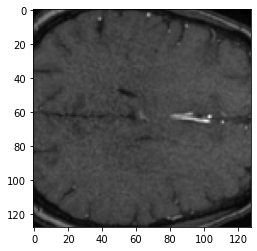

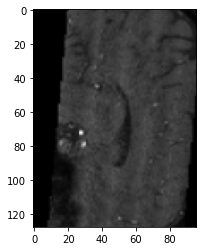

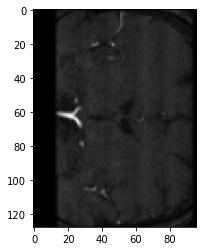

In [21]:
plt.imshow(img[0,:,:,60],'gray')
plt.show()
plt.imshow(img[0,70,:,:],'gray')
plt.show()
plt.imshow(img[0,:,70,:],'gray')
plt.show()

In [22]:
training_batch_size = 8
validation_batch_size = 8

training_loader = torch.utils.data.DataLoader(
    training_set,
    batch_size=training_batch_size,
    shuffle=True,
    num_workers=0,
)

validation_loader = torch.utils.data.DataLoader(
    validation_set,
    batch_size=validation_batch_size,
    num_workers=0,
)

In [23]:
class Residual(nn.Module):
  
  def __init__(self,input_channels, num_channels, use_1x1conv=False, strides=1, **kwargs):
    super(Residual, self).__init__(**kwargs)
    self.conv1 = nn.Conv3d(input_channels, num_channels,kernel_size=3, padding=1, stride=strides)
    self.conv2 = nn.Conv3d(num_channels, num_channels, kernel_size=3, padding=1)
    if use_1x1conv:
      self.conv3 = nn.Conv3d(input_channels, num_channels, kernel_size=1, stride=strides)
    else:
      self.conv3 = None
    self.bn1 = nn.BatchNorm3d(num_channels)
    self.bn2 = nn.BatchNorm3d(num_channels)
    self.relu = nn.LeakyReLU(inplace=True)
    #self.maxpool=nn.MaxPool3d((2,2,2),stride=2)
  
  def forward(self, X):
    
    Y = self.relu(self.bn1(self.conv1(X)))
    Y = self.bn2(self.conv2(Y))
    if self.conv3:
      X = self.conv3(X)
    Y += X
    Y =self.relu(Y)
    return Y

b1 = nn.Sequential(nn.Conv3d(1, 64, kernel_size=7, stride=2, padding=3),
                    nn.BatchNorm3d(64),
                    nn.LeakyReLU(),
                    nn.MaxPool3d(kernel_size=3, stride=2, padding=1))

def resnet_block(input_channels, num_channels, num_residuals, first_block=False):
  blk = []
  for i in range(num_residuals):
    if i == 0 and not first_block:
      blk.append(Residual(input_channels, num_channels, use_1x1conv=True, strides=2))
    else:
      blk.append(Residual(num_channels, num_channels))
  return blk

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
b2=nn.Sequential(*resnet_block(64,64,1,first_block=True))
b3=nn.Sequential(*resnet_block(64,128,1))
b4=nn.Sequential(*resnet_block(128,256,1))
b5=nn.Sequential(*resnet_block(256,512,1))

model=nn.Sequential(b1,b2,b3,b4,b5,nn.AdaptiveMaxPool3d((1,1,1)),Flatten(),nn.Linear(512, 1))

In [24]:
#Definition of hyperparameters
num_epochs = 150

#Parameter initialization
#def init_weights(m):
#    if type(m) == nn.Linear or type(m) == nn.Conv3d:
#        torch.nn.init.kaiming_normal_(m.weight)
#model.apply(init_weights)

error = torch.nn.L1Loss()

# Optimizer
learning_rate = 3e-4
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate,weight_decay=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=1,factor=0.9)

- 일단 resnet의 기본에 resnet으로 저장, augmentation도 아주 기본으로
- epoch=100, lr=3e-4, batchsize=4, augmentation 기본, (128,128,108)로 valid loss=0.08대로 나옴 진짜 감사합니다...모델의 중요성...

epoch_train :  1
train loss:  0.0886847789470966
outputs :  tensor([[0.3894],
        [0.6883]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2812],
        [0.8080]], device='cuda:0')
valid_epoch: 1  valid_loss: 0.06716731190681458 


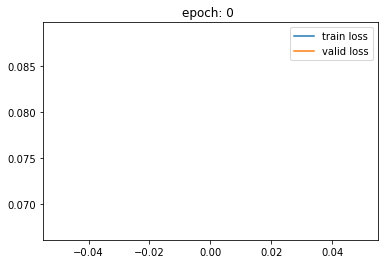

train loss:  0.0886847789470966
valid loss:  0.06716731190681458
epoch_train :  2
train loss:  0.08791731871091403
outputs :  tensor([[0.4446],
        [0.6435]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3777],
        [0.5461]], device='cuda:0')
valid_epoch: 2  valid_loss: 0.16614944594247 


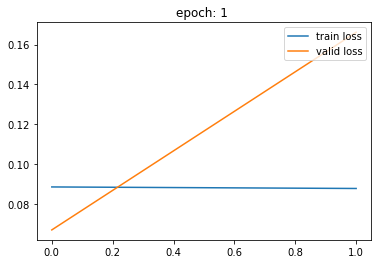

train loss:  0.08791731871091403
valid loss:  0.16614944594247
epoch_train :  3
train loss:  0.07260668277740479
outputs :  tensor([[0.3836],
        [0.3149]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4735],
        [0.3012]], device='cuda:0')
valid_epoch: 3  valid_loss: 0.0706602760723659 


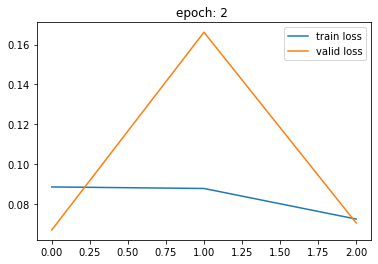

train loss:  0.07260668277740479
valid loss:  0.0706602760723659
epoch_train :  4
train loss:  0.08482467211209811
outputs :  tensor([[0.2658],
        [0.4257]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4120],
        [0.3878]], device='cuda:0')
valid_epoch: 4  valid_loss: 0.12479874917439052 


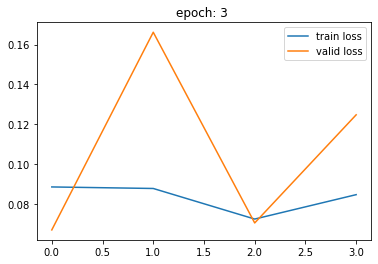

train loss:  0.08482467211209811
valid loss:  0.12479874917439052
epoch_train :  5
train loss:  0.08653306044065036
outputs :  tensor([[0.3617],
        [0.3799]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4036],
        [0.3828]], device='cuda:0')
valid_epoch: 5  valid_loss: 0.06465065479278564 


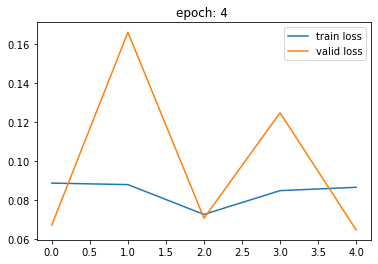

train loss:  0.08653306044065036
valid loss:  0.06465065479278564
epoch_train :  6
train loss:  0.06503797494448148
outputs :  tensor([[0.2837],
        [0.3720]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2370],
        [0.2812]], device='cuda:0')
valid_epoch: 6  valid_loss: 0.0680299529007503 


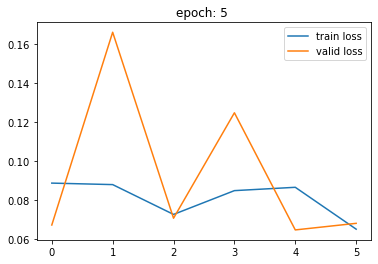

train loss:  0.06503797494448148
valid loss:  0.0680299529007503
epoch_train :  7
train loss:  0.07849552998175988
outputs :  tensor([[0.2595],
        [0.5936]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3217],
        [0.6149]], device='cuda:0')
valid_epoch: 7  valid_loss: 0.09503367117473058 


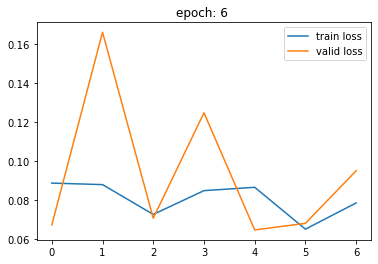

train loss:  0.07849552998175988
valid loss:  0.09503367117473058
epoch_train :  8
train loss:  0.0642780799132127
outputs :  tensor([[0.5156],
        [0.2853]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4992],
        [0.2733]], device='cuda:0')
valid_epoch: 8  valid_loss: 0.09453941243035453 


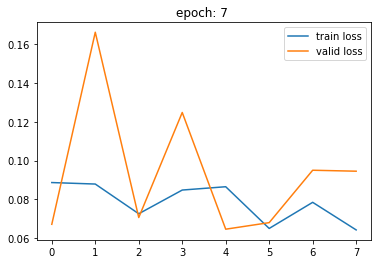

train loss:  0.0642780799132127
valid loss:  0.09453941243035453
epoch_train :  9
train loss:  0.07801138437711276
outputs :  tensor([[0.2525],
        [0.5868]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2553],
        [0.6782]], device='cuda:0')
valid_epoch: 9  valid_loss: 0.08909639290400914 


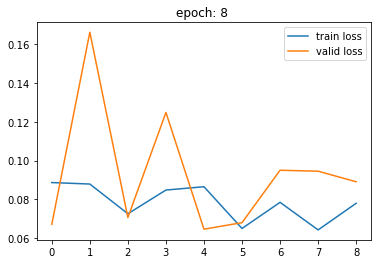

train loss:  0.07801138437711276
valid loss:  0.08909639290400914
epoch_train :  10
train loss:  0.06683796644210815
outputs :  tensor([[0.3728],
        [0.6392]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2911],
        [0.5837]], device='cuda:0')
valid_epoch: 10  valid_loss: 0.08051433733531407 


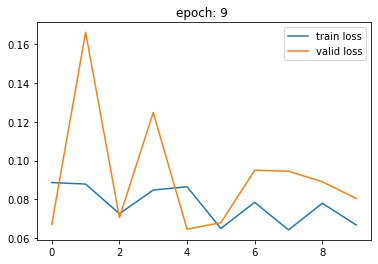

train loss:  0.06683796644210815
valid loss:  0.08051433733531407
epoch_train :  11
train loss:  0.0713551273712745
outputs :  tensor([[0.5266],
        [0.7143]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3770],
        [0.6342]], device='cuda:0')
valid_epoch: 11  valid_loss: 0.08469041756221227 


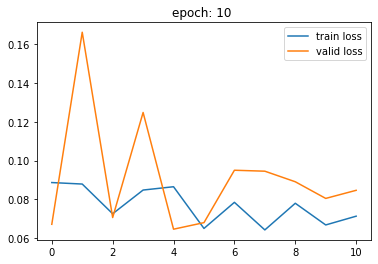

train loss:  0.0713551273712745
valid loss:  0.08469041756221227
epoch_train :  12
train loss:  0.06808547790233906
outputs :  tensor([[0.5626],
        [0.4979]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6339],
        [0.7259]], device='cuda:0')
valid_epoch: 12  valid_loss: 0.07491801466260638 


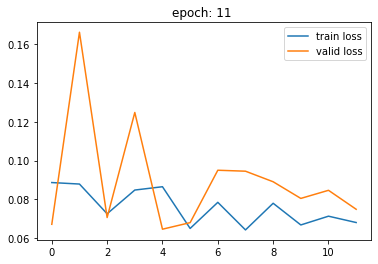

train loss:  0.06808547790233906
valid loss:  0.07491801466260638
epoch_train :  13
train loss:  0.0705994230050307
outputs :  tensor([[0.5462],
        [0.4531]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3190],
        [0.3196]], device='cuda:0')
valid_epoch: 13  valid_loss: 0.0827298675264631 


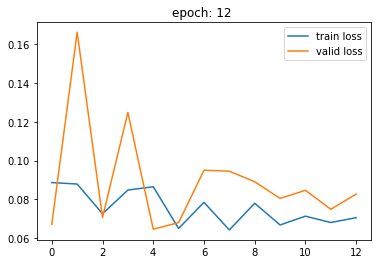

train loss:  0.0705994230050307
valid loss:  0.0827298675264631
epoch_train :  14
train loss:  0.07288386730047372
outputs :  tensor([[0.5462],
        [0.3766]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4637],
        [0.2698]], device='cuda:0')
valid_epoch: 14  valid_loss: 0.07004803844860621 


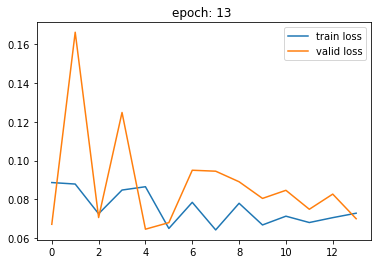

train loss:  0.07288386730047372
valid loss:  0.07004803844860621
epoch_train :  15
train loss:  0.07256804521267231
outputs :  tensor([[0.5645],
        [0.7100]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5421],
        [0.7858]], device='cuda:0')
valid_epoch: 15  valid_loss: 0.09867627280099052 


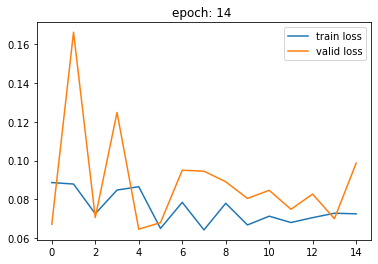

train loss:  0.07256804521267231
valid loss:  0.09867627280099052
epoch_train :  16
train loss:  0.06512440626437847
outputs :  tensor([[0.3218],
        [0.2253]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3007],
        [0.2738]], device='cuda:0')
valid_epoch: 16  valid_loss: 0.09994928325925555 


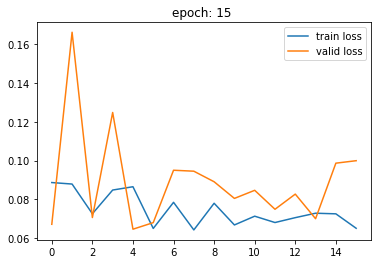

train loss:  0.06512440626437847
valid loss:  0.09994928325925555
epoch_train :  17
train loss:  0.07208339067605826
outputs :  tensor([[0.5723],
        [0.3306]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6090],
        [0.4526]], device='cuda:0')
valid_epoch: 17  valid_loss: 0.0932861055646624 


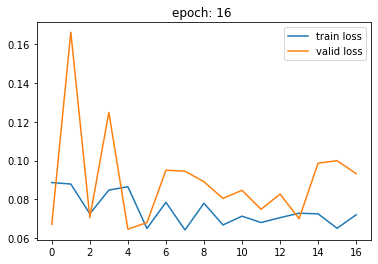

train loss:  0.07208339067605826
valid loss:  0.0932861055646624
epoch_train :  18
train loss:  0.06488315875713642
outputs :  tensor([[0.5526],
        [0.5597]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6325],
        [0.6637]], device='cuda:0')
valid_epoch: 18  valid_loss: 0.08275202342442103 


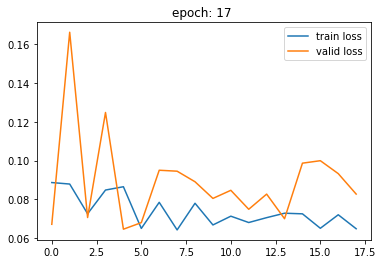

train loss:  0.06488315875713642
valid loss:  0.08275202342442103
epoch_train :  19
train loss:  0.07040720719557542
outputs :  tensor([[0.7018],
        [0.4995]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6087],
        [0.4805]], device='cuda:0')
valid_epoch: 19  valid_loss: 0.09609832082475935 


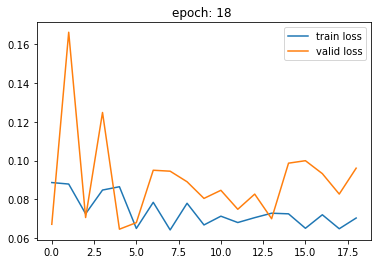

train loss:  0.07040720719557542
valid loss:  0.09609832082475935
epoch_train :  20
train loss:  0.0711365296290471
outputs :  tensor([[0.5732],
        [0.5618]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6427],
        [0.3421]], device='cuda:0')
valid_epoch: 20  valid_loss: 0.0656713332448687 


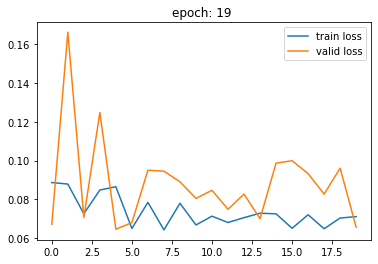

train loss:  0.0711365296290471
valid loss:  0.0656713332448687
epoch_train :  21
train loss:  0.06021311649909386
outputs :  tensor([[0.6378],
        [0.6162]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6827],
        [0.6280]], device='cuda:0')
valid_epoch: 21  valid_loss: 0.06843783174242292 


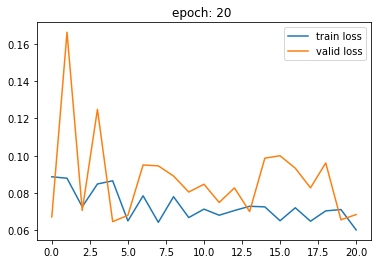

train loss:  0.06021311649909386
valid loss:  0.06843783174242292
epoch_train :  22
train loss:  0.06376497562115009
outputs :  tensor([[0.7175],
        [0.6138]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.8194],
        [0.5837]], device='cuda:0')
valid_epoch: 22  valid_loss: 0.07032812493188041 


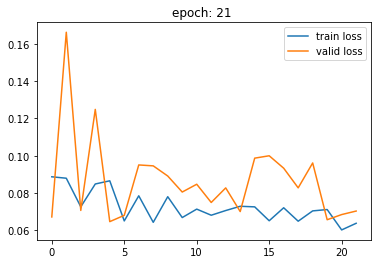

train loss:  0.06376497562115009
valid loss:  0.07032812493188041
epoch_train :  23
train loss:  0.058145688130305365
outputs :  tensor([[0.2392],
        [0.5984]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2462],
        [0.5828]], device='cuda:0')
valid_epoch: 23  valid_loss: 0.07290654523032052 


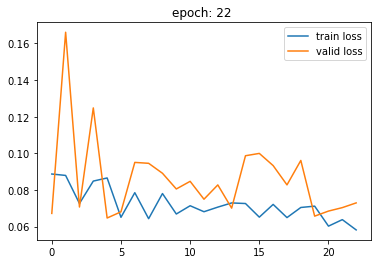

train loss:  0.058145688130305365
valid loss:  0.07290654523032052
epoch_train :  24
train loss:  0.06555084998791035
outputs :  tensor([[0.5707],
        [0.2858]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5969],
        [0.2558]], device='cuda:0')
valid_epoch: 24  valid_loss: 0.08297767809459142 


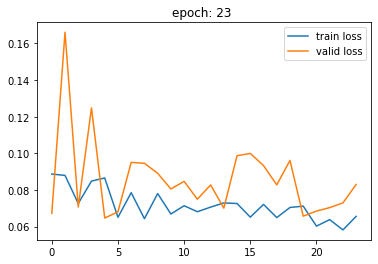

train loss:  0.06555084998791035
valid loss:  0.08297767809459142
epoch_train :  25
train loss:  0.056399446267348066
outputs :  tensor([[0.2587],
        [0.5676]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4123],
        [0.6388]], device='cuda:0')
valid_epoch: 25  valid_loss: 0.06682338459151131 


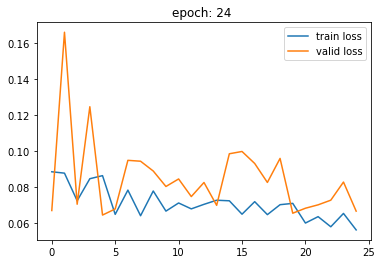

train loss:  0.056399446267348066
valid loss:  0.06682338459151131
epoch_train :  26
train loss:  0.058840040977184586
outputs :  tensor([[0.6721],
        [0.3016]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6848],
        [0.4382]], device='cuda:0')
valid_epoch: 26  valid_loss: 0.08677451951163155 


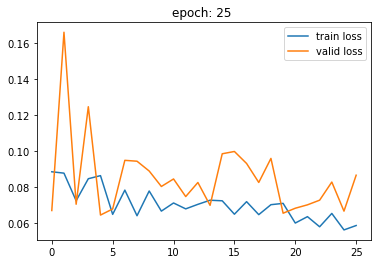

train loss:  0.058840040977184586
valid loss:  0.08677451951163155
epoch_train :  27
train loss:  0.0570567617049584
outputs :  tensor([[0.5690],
        [0.3749]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6093],
        [0.4120]], device='cuda:0')
valid_epoch: 27  valid_loss: 0.0627660836492266 


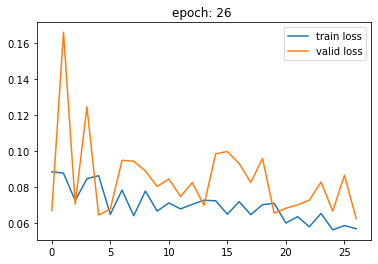

train loss:  0.0570567617049584
valid loss:  0.0627660836492266
epoch_train :  28
train loss:  0.05965205797782311
outputs :  tensor([[0.5284],
        [0.4847]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6410],
        [0.5354]], device='cuda:0')
valid_epoch: 28  valid_loss: 0.0812883802822658 


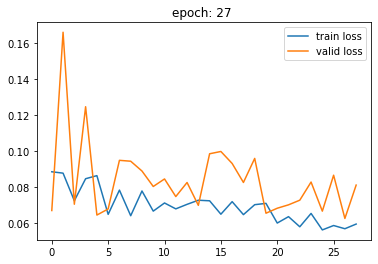

train loss:  0.05965205797782311
valid loss:  0.0812883802822658
epoch_train :  29
train loss:  0.05921317063845121
outputs :  tensor([[0.5387],
        [0.6447]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5984],
        [0.7354]], device='cuda:0')
valid_epoch: 29  valid_loss: 0.07240061249051775 


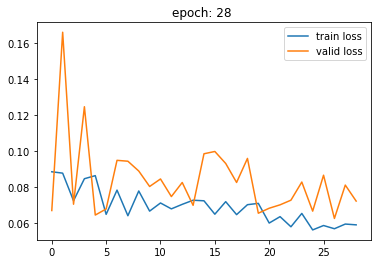

train loss:  0.05921317063845121
valid loss:  0.07240061249051775
epoch_train :  30
train loss:  0.05763994730435885
outputs :  tensor([[0.7481],
        [0.6376]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6774],
        [0.6812]], device='cuda:0')
valid_epoch: 30  valid_loss: 0.06556386607033866 


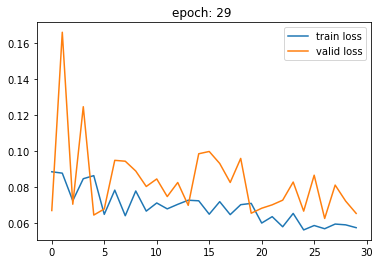

train loss:  0.05763994730435885
valid loss:  0.06556386607033866
epoch_train :  31
train loss:  0.059414996550633356
outputs :  tensor([[0.2329],
        [0.4231]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2571],
        [0.2485]], device='cuda:0')
valid_epoch: 31  valid_loss: 0.08069925648825509 


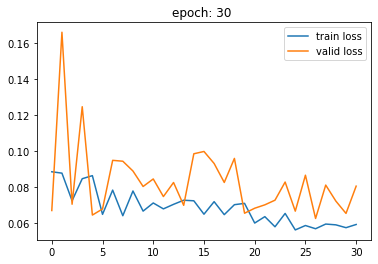

train loss:  0.059414996550633356
valid loss:  0.08069925648825509
epoch_train :  32
train loss:  0.05841344594955444
outputs :  tensor([[0.5768],
        [0.4918]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5857],
        [0.5989]], device='cuda:0')
valid_epoch: 32  valid_loss: 0.09342332397188459 


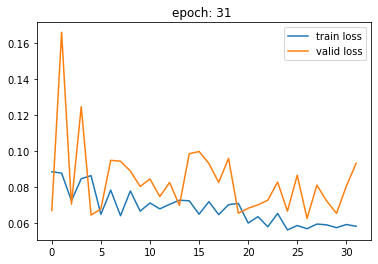

train loss:  0.05841344594955444
valid loss:  0.09342332397188459
epoch_train :  33
train loss:  0.058128214799440824
outputs :  tensor([[0.5518],
        [0.3702]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5560],
        [0.5583]], device='cuda:0')
valid_epoch: 33  valid_loss: 0.08631130627223424 


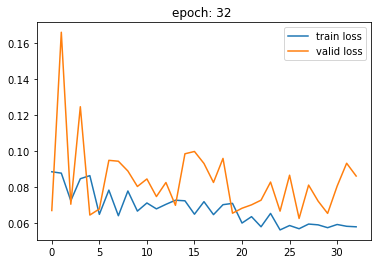

train loss:  0.058128214799440824
valid loss:  0.08631130627223424
epoch_train :  34
train loss:  0.05482937739445613
outputs :  tensor([[0.3985],
        [0.6102]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5419],
        [0.6633]], device='cuda:0')
valid_epoch: 34  valid_loss: 0.05815918956484113 


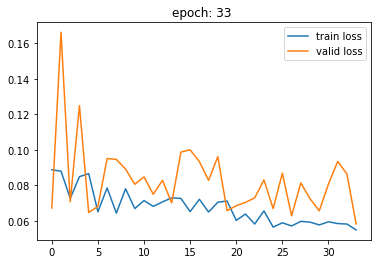

train loss:  0.05482937739445613
valid loss:  0.05815918956484113
epoch_train :  35
train loss:  0.052687383615053617
outputs :  tensor([[0.4110],
        [0.3129]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3770],
        [0.3042]], device='cuda:0')
valid_epoch: 35  valid_loss: 0.05785269396645682 


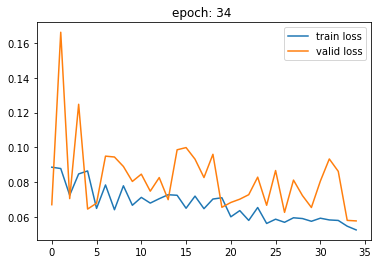

train loss:  0.052687383615053617
valid loss:  0.05785269396645682
epoch_train :  36
train loss:  0.0519214730996352
outputs :  tensor([[0.2828],
        [0.3523]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2739],
        [0.3429]], device='cuda:0')
valid_epoch: 36  valid_loss: 0.09225145408085414 


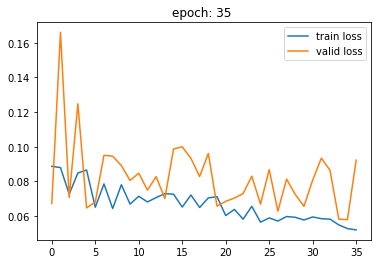

train loss:  0.0519214730996352
valid loss:  0.09225145408085414
epoch_train :  37
train loss:  0.05873986390920786
outputs :  tensor([[0.5965],
        [0.6501]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7354],
        [0.7231]], device='cuda:0')
valid_epoch: 37  valid_loss: 0.06392356753349304 


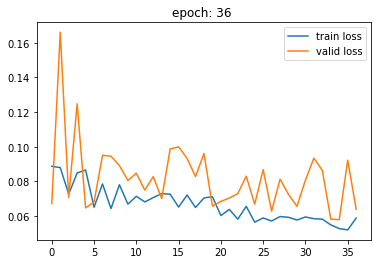

train loss:  0.05873986390920786
valid loss:  0.06392356753349304
epoch_train :  38
train loss:  0.05646808789326595
outputs :  tensor([[0.5114],
        [0.3027]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5558],
        [0.3502]], device='cuda:0')
valid_epoch: 38  valid_loss: 0.06253821509225028 


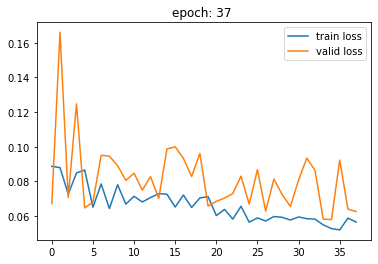

train loss:  0.05646808789326595
valid loss:  0.06253821509225028
epoch_train :  39
train loss:  0.05197960138320923
outputs :  tensor([[0.6162],
        [0.5333]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5774],
        [0.5566]], device='cuda:0')
valid_epoch: 39  valid_loss: 0.06675980346543449 


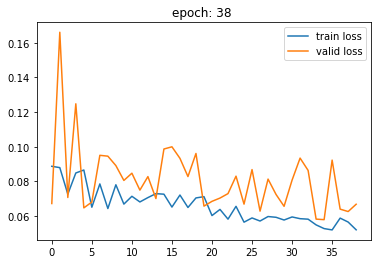

train loss:  0.05197960138320923
valid loss:  0.06675980346543449
epoch_train :  40
train loss:  0.055677528564746566
outputs :  tensor([[0.5871],
        [0.3741]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5341],
        [0.2485]], device='cuda:0')
valid_epoch: 40  valid_loss: 0.07823281628744942 


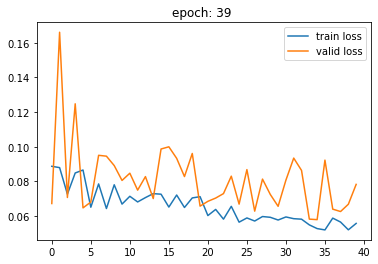

train loss:  0.055677528564746566
valid loss:  0.07823281628744942
epoch_train :  41
train loss:  0.05480930896905752
outputs :  tensor([[0.6484],
        [0.6351]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5991],
        [0.5866]], device='cuda:0')
valid_epoch: 41  valid_loss: 0.06185939482280186 


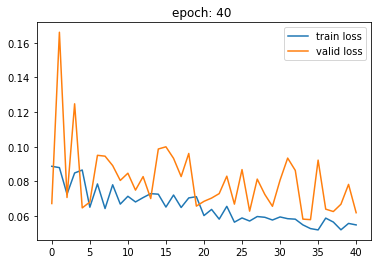

train loss:  0.05480930896905752
valid loss:  0.06185939482280186
epoch_train :  42
train loss:  0.052026684467609115
outputs :  tensor([[0.6223],
        [0.4862]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5926],
        [0.5354]], device='cuda:0')
valid_epoch: 42  valid_loss: 0.05609237721988133 


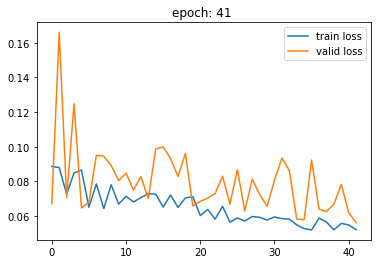

train loss:  0.052026684467609115
valid loss:  0.05609237721988133
epoch_train :  43
train loss:  0.055489535515124984
outputs :  tensor([[0.6227],
        [0.4876]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4182],
        [0.5696]], device='cuda:0')
valid_epoch: 43  valid_loss: 0.06182834080287388 


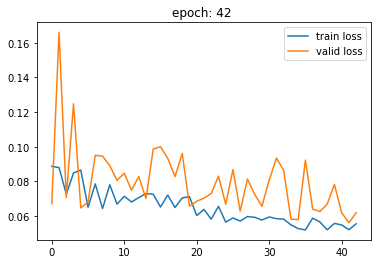

train loss:  0.055489535515124984
valid loss:  0.06182834080287388
epoch_train :  44
train loss:  0.05155030580667349
outputs :  tensor([[0.3294],
        [0.5125]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2434],
        [0.5375]], device='cuda:0')
valid_epoch: 44  valid_loss: 0.0595997827393668 


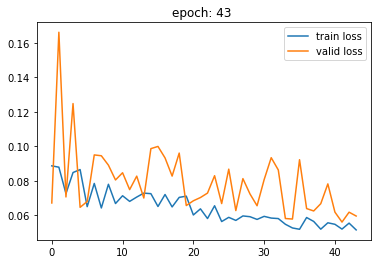

train loss:  0.05155030580667349
valid loss:  0.0595997827393668
epoch_train :  45
train loss:  0.050596654415130615
outputs :  tensor([[0.2269],
        [0.6593]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2017],
        [0.6913]], device='cuda:0')
valid_epoch: 45  valid_loss: 0.07827728135245186 


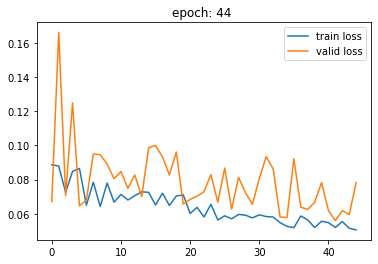

train loss:  0.050596654415130615
valid loss:  0.07827728135245186
epoch_train :  46
train loss:  0.05034803885679979
outputs :  tensor([[0.5232],
        [0.6047]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5721],
        [0.6008]], device='cuda:0')
valid_epoch: 46  valid_loss: 0.05941645588193621 


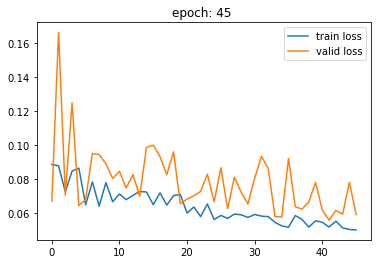

train loss:  0.05034803885679979
valid loss:  0.05941645588193621
epoch_train :  47
train loss:  0.0504499811392564
outputs :  tensor([[0.5821],
        [0.2777]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4182],
        [0.2157]], device='cuda:0')
valid_epoch: 47  valid_loss: 0.07111785667283195 


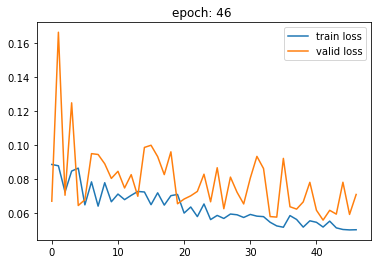

train loss:  0.0504499811392564
valid loss:  0.07111785667283195
epoch_train :  48
train loss:  0.052535020388089694
outputs :  tensor([[0.4299],
        [0.2218]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5512],
        [0.2091]], device='cuda:0')
valid_epoch: 48  valid_loss: 0.06260821649006434 


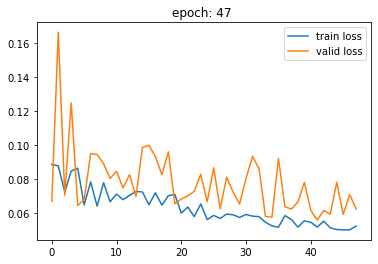

train loss:  0.052535020388089694
valid loss:  0.06260821649006434
epoch_train :  49
train loss:  0.047642992093012884
outputs :  tensor([[0.5146],
        [0.2774]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5461],
        [0.2553]], device='cuda:0')
valid_epoch: 49  valid_loss: 0.06199305398123605 


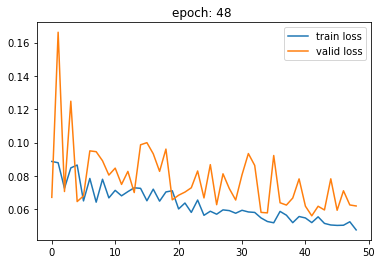

train loss:  0.047642992093012884
valid loss:  0.06199305398123605
epoch_train :  50
train loss:  0.05050561519769522
outputs :  tensor([[0.7079],
        [0.6842]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7318],
        [0.7356]], device='cuda:0')
valid_epoch: 50  valid_loss: 0.06332334876060486 


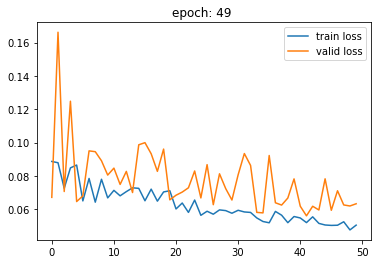

train loss:  0.05050561519769522
valid loss:  0.06332334876060486
epoch_train :  51
train loss:  0.0537443940456097
outputs :  tensor([[0.4310],
        [0.2405]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3647],
        [0.2257]], device='cuda:0')
valid_epoch: 51  valid_loss: 0.06536652360643659 


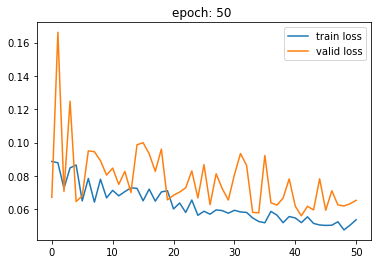

train loss:  0.0537443940456097
valid loss:  0.06536652360643659
epoch_train :  52
train loss:  0.05179569812921377
outputs :  tensor([[0.4720],
        [0.2825]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4174],
        [0.5253]], device='cuda:0')
valid_epoch: 52  valid_loss: 0.060130723885127475 


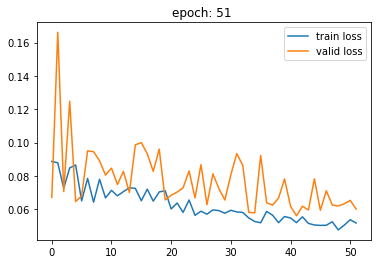

train loss:  0.05179569812921377
valid loss:  0.060130723885127475
epoch_train :  53
train loss:  0.04830320064838116
outputs :  tensor([[0.6033],
        [0.2962]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5991],
        [0.2692]], device='cuda:0')
valid_epoch: 53  valid_loss: 0.06446369205202375 


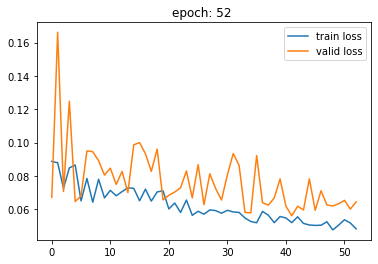

train loss:  0.04830320064838116
valid loss:  0.06446369205202375
epoch_train :  54
train loss:  0.04997283220291138
outputs :  tensor([[0.6087],
        [0.6530]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6274],
        [0.6716]], device='cuda:0')
valid_epoch: 54  valid_loss: 0.05955090693065098 


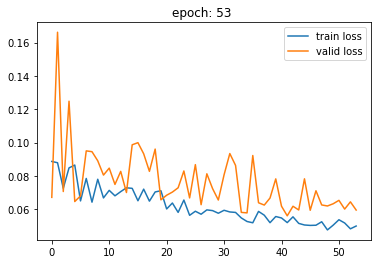

train loss:  0.04997283220291138
valid loss:  0.05955090693065098
epoch_train :  55
train loss:  0.04786801796693068
outputs :  tensor([[0.6750],
        [0.5032]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6928],
        [0.4637]], device='cuda:0')
valid_epoch: 55  valid_loss: 0.06283746872629438 


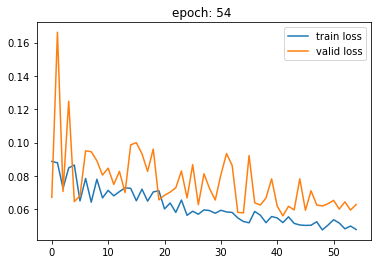

train loss:  0.04786801796693068
valid loss:  0.06283746872629438
epoch_train :  56
train loss:  0.04976901182761559
outputs :  tensor([[0.6964],
        [0.5167]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.8194],
        [0.5166]], device='cuda:0')
valid_epoch: 56  valid_loss: 0.06545096635818481 


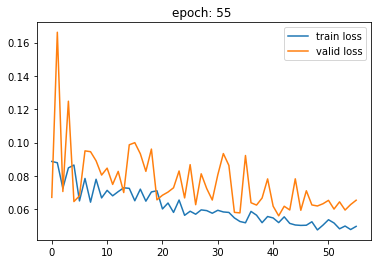

train loss:  0.04976901182761559
valid loss:  0.06545096635818481
epoch_train :  57
train loss:  0.050065842958597034
outputs :  tensor([[0.7204],
        [0.6449]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7025],
        [0.6041]], device='cuda:0')
valid_epoch: 57  valid_loss: 0.058278756482260566 


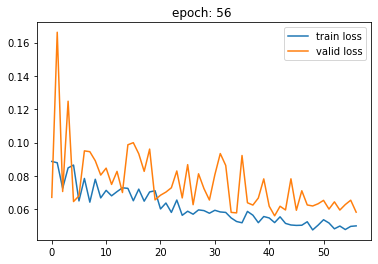

train loss:  0.050065842958597034
valid loss:  0.058278756482260566
epoch_train :  58
train loss:  0.049762955078711875
outputs :  tensor([[0.5386],
        [0.4019]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3599],
        [0.3859]], device='cuda:0')
valid_epoch: 58  valid_loss: 0.057960408074515204 


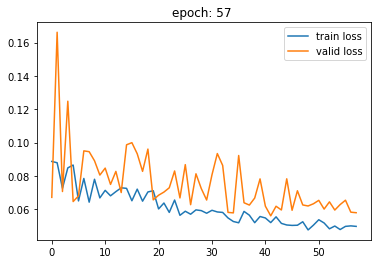

train loss:  0.049762955078711875
valid loss:  0.057960408074515204
epoch_train :  59
train loss:  0.04889337374613835
outputs :  tensor([[0.6686],
        [0.4604]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6274],
        [0.3938]], device='cuda:0')
valid_epoch: 59  valid_loss: 0.05857301609856742 


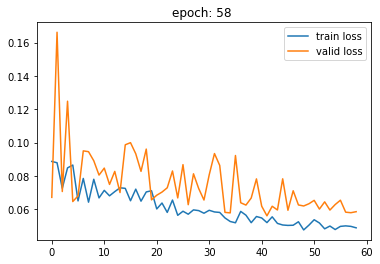

train loss:  0.04889337374613835
valid loss:  0.05857301609856742
epoch_train :  60
train loss:  0.05010815308644222
outputs :  tensor([[0.6966],
        [0.5914]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7259],
        [0.5828]], device='cuda:0')
valid_epoch: 60  valid_loss: 0.05893004792077201 


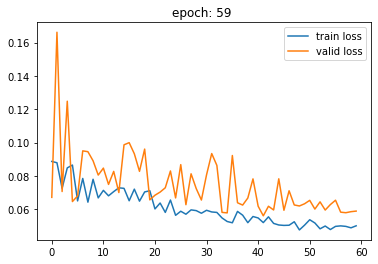

train loss:  0.05010815308644222
valid loss:  0.05893004792077201
epoch_train :  61
train loss:  0.052068930405836836
outputs :  tensor([[0.2692],
        [0.4446]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4392],
        [0.3823]], device='cuda:0')
valid_epoch: 61  valid_loss: 0.058968305587768555 


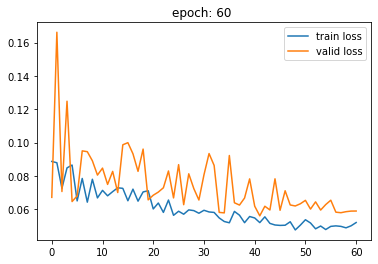

train loss:  0.052068930405836836
valid loss:  0.058968305587768555
epoch_train :  62
train loss:  0.05038626377399151
outputs :  tensor([[0.2608],
        [0.4048]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2091],
        [0.2973]], device='cuda:0')
valid_epoch: 62  valid_loss: 0.0592408435685294 


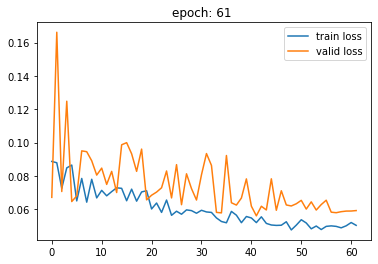

train loss:  0.05038626377399151
valid loss:  0.0592408435685294
epoch_train :  63
train loss:  0.04631139223392193
outputs :  tensor([[0.5405],
        [0.4813]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5253],
        [0.4671]], device='cuda:0')
valid_epoch: 63  valid_loss: 0.05818670988082886 


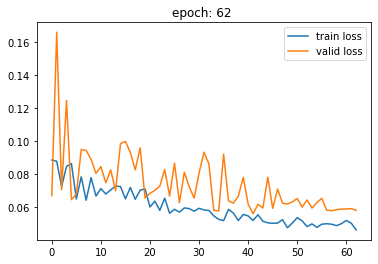

train loss:  0.04631139223392193
valid loss:  0.05818670988082886
epoch_train :  64
train loss:  0.04970044814623319
outputs :  tensor([[0.2438],
        [0.6415]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3437],
        [0.6342]], device='cuda:0')
valid_epoch: 64  valid_loss: 0.06027098212923322 


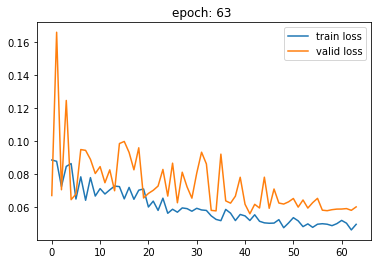

train loss:  0.04970044814623319
valid loss:  0.06027098212923322
epoch_train :  65
train loss:  0.04789572037183321
outputs :  tensor([[0.6088],
        [0.5749]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5877],
        [0.7213]], device='cuda:0')
valid_epoch: 65  valid_loss: 0.059251261608941216 


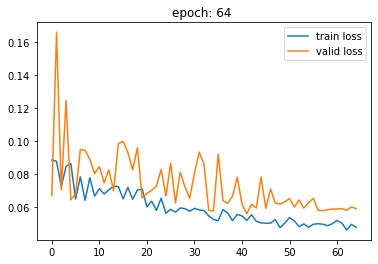

train loss:  0.04789572037183321
valid loss:  0.059251261608941216
epoch_train :  66
train loss:  0.04735154371995192
outputs :  tensor([[0.5149],
        [0.6045]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5367],
        [0.5804]], device='cuda:0')
valid_epoch: 66  valid_loss: 0.05813871111188616 


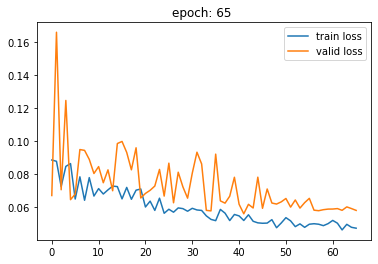

train loss:  0.04735154371995192
valid loss:  0.05813871111188616
epoch_train :  67
train loss:  0.04652791298352755
outputs :  tensor([[0.6321],
        [0.6419]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6340],
        [0.5967]], device='cuda:0')
valid_epoch: 67  valid_loss: 0.05775110636438642 


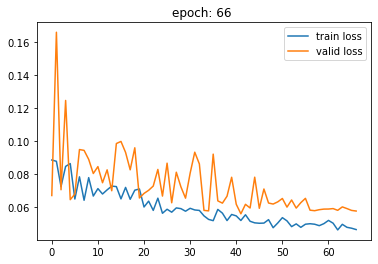

train loss:  0.04652791298352755
valid loss:  0.05775110636438642
epoch_train :  68
train loss:  0.05030167102813721
outputs :  tensor([[0.3146],
        [0.4309]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2893],
        [0.3448]], device='cuda:0')
valid_epoch: 68  valid_loss: 0.05857548543385097 


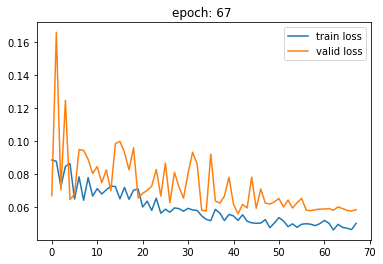

train loss:  0.05030167102813721
valid loss:  0.05857548543385097
epoch_train :  69
train loss:  0.044668339765988864
outputs :  tensor([[0.6966],
        [0.6208]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6928],
        [0.6008]], device='cuda:0')
valid_epoch: 69  valid_loss: 0.06011001978601728 


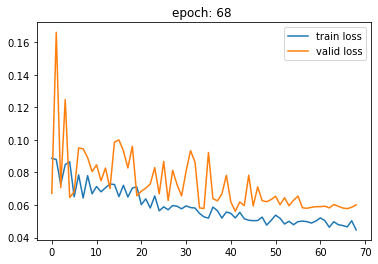

train loss:  0.044668339765988864
valid loss:  0.06011001978601728
epoch_train :  70
train loss:  0.04640604899479793
outputs :  tensor([[0.2822],
        [0.2727]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2462],
        [0.2457]], device='cuda:0')
valid_epoch: 70  valid_loss: 0.0594217096056257 


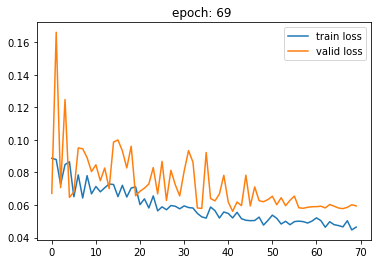

train loss:  0.04640604899479793
valid loss:  0.0594217096056257
epoch_train :  71
train loss:  0.05026033749947181
outputs :  tensor([[0.6955],
        [0.5622]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6340],
        [0.5828]], device='cuda:0')
valid_epoch: 71  valid_loss: 0.05860857878412519 


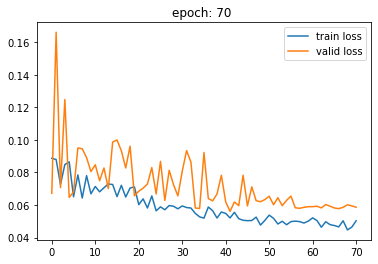

train loss:  0.05026033749947181
valid loss:  0.05860857878412519
epoch_train :  72
train loss:  0.04822248678940993
outputs :  tensor([[0.6832],
        [0.6358]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6340],
        [0.6633]], device='cuda:0')
valid_epoch: 72  valid_loss: 0.0571816691330501 


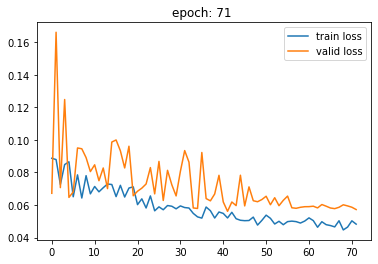

train loss:  0.04822248678940993
valid loss:  0.0571816691330501
epoch_train :  73
train loss:  0.0504716497201186
outputs :  tensor([[0.3193],
        [0.4964]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2457],
        [0.4316]], device='cuda:0')
valid_epoch: 73  valid_loss: 0.058790896620069234 


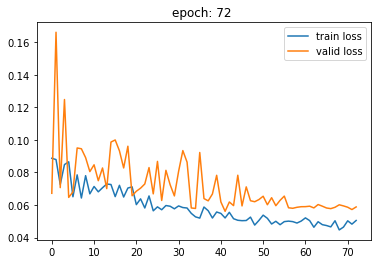

train loss:  0.0504716497201186
valid loss:  0.058790896620069234
epoch_train :  74
train loss:  0.046830241496746354
outputs :  tensor([[0.5963],
        [0.3456]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6011],
        [0.3018]], device='cuda:0')
valid_epoch: 74  valid_loss: 0.05856220211301531 


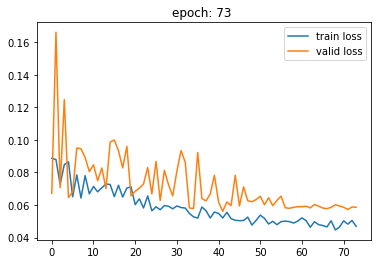

train loss:  0.046830241496746354
valid loss:  0.05856220211301531
epoch_train :  75
train loss:  0.04898643493652344
outputs :  tensor([[0.3745],
        [0.4117]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3552],
        [0.4805]], device='cuda:0')
valid_epoch: 75  valid_loss: 0.057584404945373535 


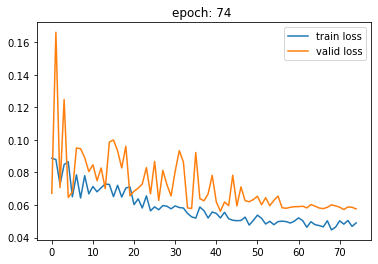

train loss:  0.04898643493652344
valid loss:  0.057584404945373535
epoch_train :  76
train loss:  0.04742229443330031
outputs :  tensor([[0.3006],
        [0.6836]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3294],
        [0.6711]], device='cuda:0')
valid_epoch: 76  valid_loss: 0.06136089137622288 


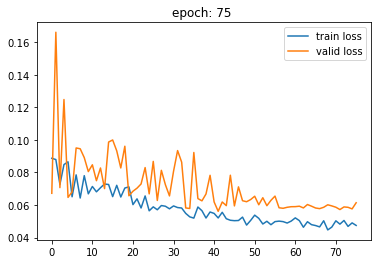

train loss:  0.04742229443330031
valid loss:  0.06136089137622288
epoch_train :  77
train loss:  0.04820422942821796
outputs :  tensor([[0.4682],
        [0.7854]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4833],
        [0.8346]], device='cuda:0')
valid_epoch: 77  valid_loss: 0.057176130158560615 


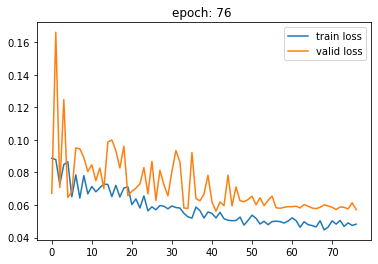

train loss:  0.04820422942821796
valid loss:  0.057176130158560615
epoch_train :  78
train loss:  0.04244716350848858
outputs :  tensor([[0.6932],
        [0.2467]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6848],
        [0.2559]], device='cuda:0')
valid_epoch: 78  valid_loss: 0.05766428368432181 


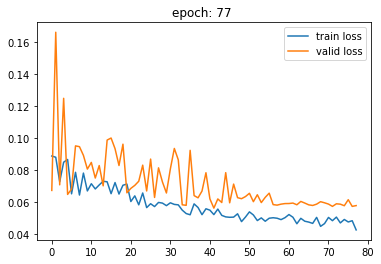

train loss:  0.04244716350848858
valid loss:  0.05766428368432181
epoch_train :  79
train loss:  0.04614172532008244
outputs :  tensor([[0.6091],
        [0.4218]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7302],
        [0.4133]], device='cuda:0')
valid_epoch: 79  valid_loss: 0.056960118668419976 


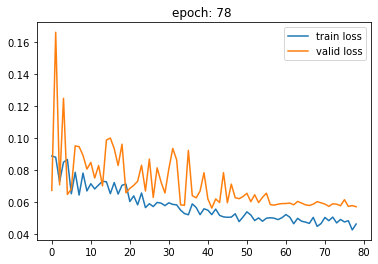

train loss:  0.04614172532008244
valid loss:  0.056960118668419976
epoch_train :  80
train loss:  0.04665727340258085
outputs :  tensor([[0.6666],
        [0.4796]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6339],
        [0.5367]], device='cuda:0')
valid_epoch: 80  valid_loss: 0.05849173239299229 


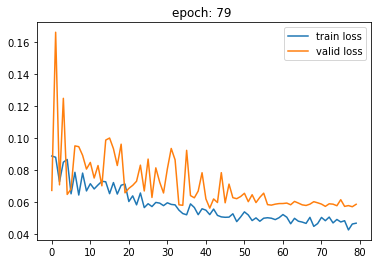

train loss:  0.04665727340258085
valid loss:  0.05849173239299229
epoch_train :  81
train loss:  0.047775406103867754
outputs :  tensor([[0.5633],
        [0.3400]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4485],
        [0.3406]], device='cuda:0')
valid_epoch: 81  valid_loss: 0.05674716404506138 


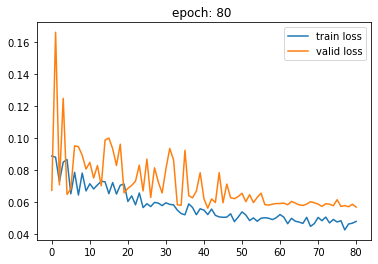

train loss:  0.047775406103867754
valid loss:  0.05674716404506138
epoch_train :  82
train loss:  0.045329043498406045
outputs :  tensor([[0.3416],
        [0.2814]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3448],
        [0.2693]], device='cuda:0')
valid_epoch: 82  valid_loss: 0.057231783866882324 


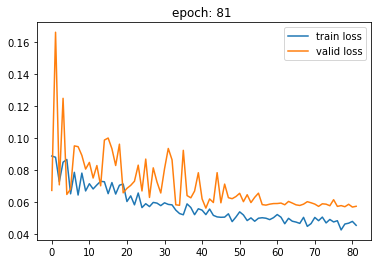

train loss:  0.045329043498406045
valid loss:  0.057231783866882324
epoch_train :  83
train loss:  0.04682725667953491
outputs :  tensor([[0.5911],
        [0.4474]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4174],
        [0.5213]], device='cuda:0')
valid_epoch: 83  valid_loss: 0.05875458887645176 


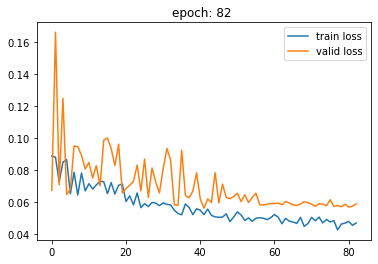

train loss:  0.04682725667953491
valid loss:  0.05875458887645176
epoch_train :  84
train loss:  0.04838390992237972
outputs :  tensor([[0.5343],
        [0.5296]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4772],
        [0.6046]], device='cuda:0')
valid_epoch: 84  valid_loss: 0.05763860259737287 


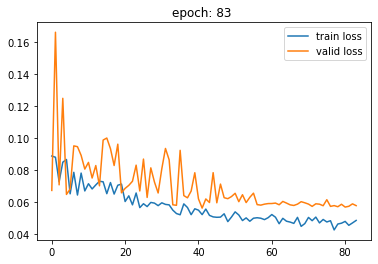

train loss:  0.04838390992237972
valid loss:  0.05763860259737287
epoch_train :  85
train loss:  0.04853889116874108
outputs :  tensor([[0.7111],
        [0.4606]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6848],
        [0.4805]], device='cuda:0')
valid_epoch: 85  valid_loss: 0.0566754766872951 


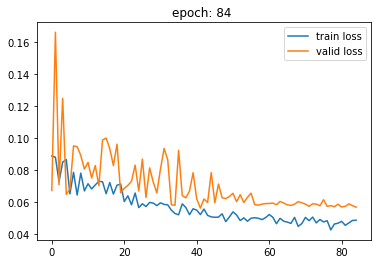

train loss:  0.04853889116874108
valid loss:  0.0566754766872951
epoch_train :  86
train loss:  0.04820207907603337
outputs :  tensor([[0.2586],
        [0.2344]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2594],
        [0.2070]], device='cuda:0')
valid_epoch: 86  valid_loss: 0.05701651743480137 


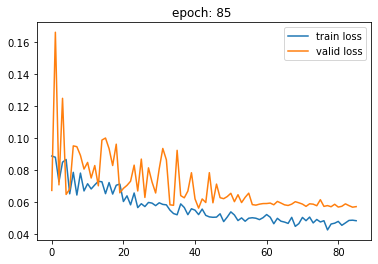

train loss:  0.04820207907603337
valid loss:  0.05701651743480137
epoch_train :  87
train loss:  0.046295340244586654
outputs :  tensor([[0.3827],
        [0.5877]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3890],
        [0.7071]], device='cuda:0')
valid_epoch: 87  valid_loss: 0.05672892076628549 


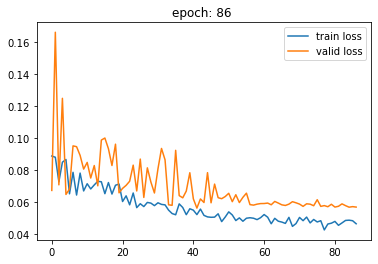

train loss:  0.046295340244586654
valid loss:  0.05672892076628549
epoch_train :  88
train loss:  0.04747452185704158
outputs :  tensor([[0.4287],
        [0.7104]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5443],
        [0.7166]], device='cuda:0')
valid_epoch: 88  valid_loss: 0.056185713836124966 


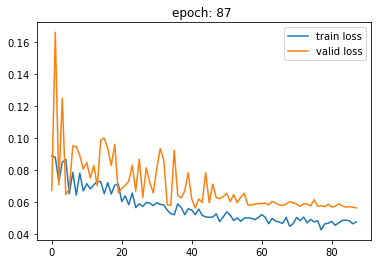

train loss:  0.04747452185704158
valid loss:  0.056185713836124966
epoch_train :  89
train loss:  0.049970613076136663
outputs :  tensor([[0.7134],
        [0.6856]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6913],
        [0.6753]], device='cuda:0')
valid_epoch: 89  valid_loss: 0.056780219078063965 


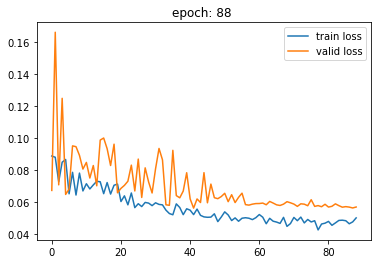

train loss:  0.049970613076136663
valid loss:  0.056780219078063965
epoch_train :  90
train loss:  0.047085349376385026
outputs :  tensor([[0.2978],
        [0.5573]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2438],
        [0.5692]], device='cuda:0')
valid_epoch: 90  valid_loss: 0.05679886681692941 


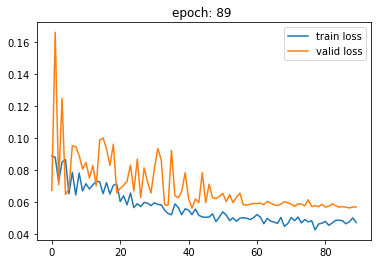

train loss:  0.047085349376385026
valid loss:  0.05679886681692941
epoch_train :  91
train loss:  0.0482329772068904
outputs :  tensor([[0.2390],
        [0.5883]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2739],
        [0.6002]], device='cuda:0')
valid_epoch: 91  valid_loss: 0.0565177457673209 


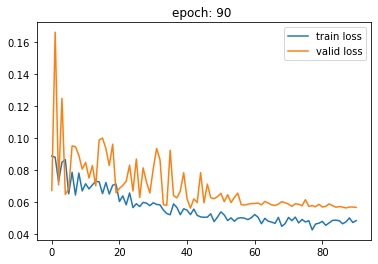

train loss:  0.0482329772068904
valid loss:  0.0565177457673209
epoch_train :  92
train loss:  0.04618730453344492
outputs :  tensor([[0.5874],
        [0.5414]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5969],
        [0.5566]], device='cuda:0')
valid_epoch: 92  valid_loss: 0.05710729530879429 


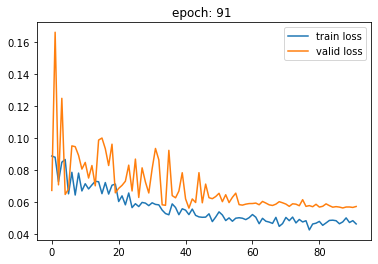

train loss:  0.04618730453344492
valid loss:  0.05710729530879429
epoch_train :  93
train loss:  0.04721689224243164
outputs :  tensor([[0.6170],
        [0.5088]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5644],
        [0.5974]], device='cuda:0')
valid_epoch: 93  valid_loss: 0.056761699063437324 


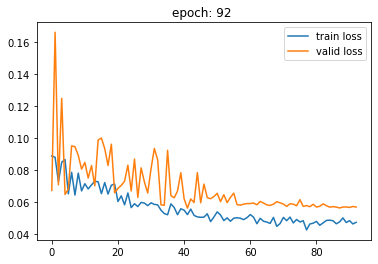

train loss:  0.04721689224243164
valid loss:  0.056761699063437324
epoch_train :  94
train loss:  0.04467210861352774
outputs :  tensor([[0.2602],
        [0.6231]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2241],
        [0.6149]], device='cuda:0')
valid_epoch: 94  valid_loss: 0.057111918926239014 


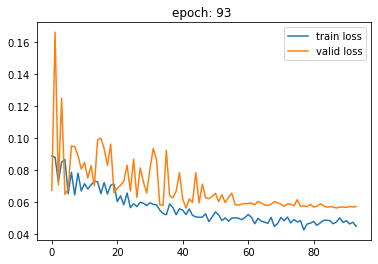

train loss:  0.04467210861352774
valid loss:  0.057111918926239014
epoch_train :  95
train loss:  0.044366153386922985
outputs :  tensor([[0.4298],
        [0.3566]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4562],
        [0.2977]], device='cuda:0')
valid_epoch: 95  valid_loss: 0.057531382356371195 


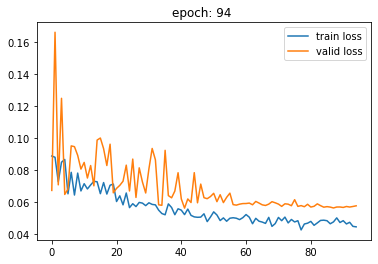

train loss:  0.044366153386922985
valid loss:  0.057531382356371195
epoch_train :  96
train loss:  0.04501431721907396
outputs :  tensor([[0.5620],
        [0.2760]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6002],
        [0.2354]], device='cuda:0')
valid_epoch: 96  valid_loss: 0.057655887944357734 


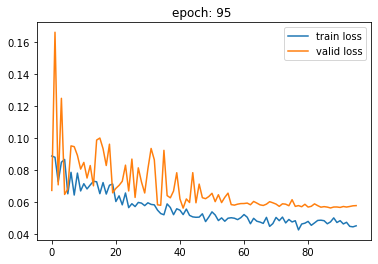

train loss:  0.04501431721907396
valid loss:  0.057655887944357734
epoch_train :  97
train loss:  0.045316797036391035
outputs :  tensor([[0.2891],
        [0.5854]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2701],
        [0.6054]], device='cuda:0')
valid_epoch: 97  valid_loss: 0.0590332065309797 


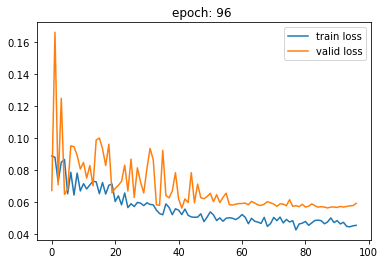

train loss:  0.045316797036391035
valid loss:  0.0590332065309797
epoch_train :  98
train loss:  0.045398482909569375
outputs :  tensor([[0.6753],
        [0.4018]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6342],
        [0.3606]], device='cuda:0')
valid_epoch: 98  valid_loss: 0.05735882690974644 


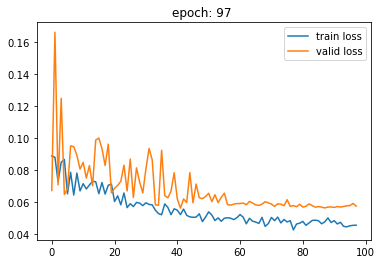

train loss:  0.045398482909569375
valid loss:  0.05735882690974644
epoch_train :  99
train loss:  0.04644147707865788
outputs :  tensor([[0.3376],
        [0.7097]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3018],
        [0.6653]], device='cuda:0')
valid_epoch: 99  valid_loss: 0.056852025645119805 


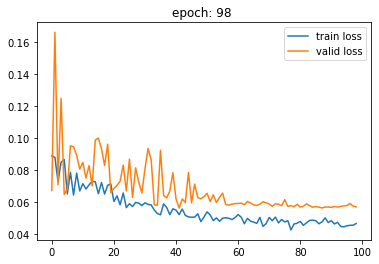

train loss:  0.04644147707865788
valid loss:  0.056852025645119805
epoch_train :  100
train loss:  0.047356876043172985
outputs :  tensor([[0.2287],
        [0.4682]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2566],
        [0.3545]], device='cuda:0')
valid_epoch: 100  valid_loss: 0.05701004607336862 


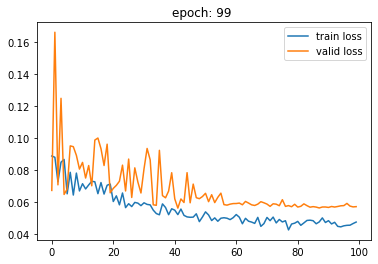

train loss:  0.047356876043172985
valid loss:  0.05701004607336862
epoch_train :  101
train loss:  0.046138451649592474
outputs :  tensor([[0.5978],
        [0.3336]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5774],
        [0.2835]], device='cuda:0')
valid_epoch: 101  valid_loss: 0.05812867624419076 


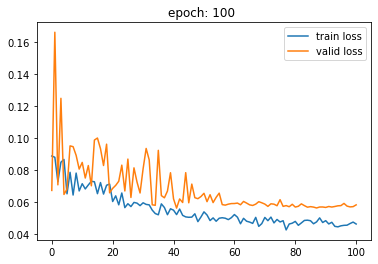

train loss:  0.046138451649592474
valid loss:  0.05812867624419076
epoch_train :  102
train loss:  0.04760716053155752
outputs :  tensor([[0.2852],
        [0.3306]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2335],
        [0.2812]], device='cuda:0')
valid_epoch: 102  valid_loss: 0.056720461164202006 


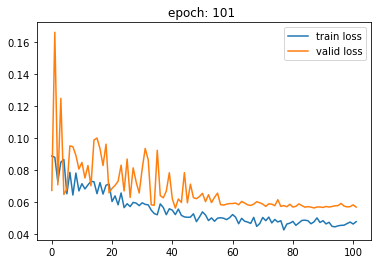

train loss:  0.04760716053155752
valid loss:  0.056720461164202006
epoch_train :  103
train loss:  0.044831353884476885
outputs :  tensor([[0.3915],
        [0.4867]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3429],
        [0.5188]], device='cuda:0')
valid_epoch: 103  valid_loss: 0.057168619973318915 


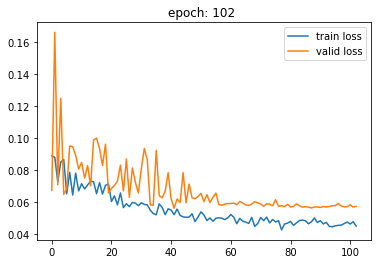

train loss:  0.044831353884476885
valid loss:  0.057168619973318915
epoch_train :  104
train loss:  0.04560383925071129
outputs :  tensor([[0.6592],
        [0.2473]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5947],
        [0.2400]], device='cuda:0')
valid_epoch: 104  valid_loss: 0.05668481758662632 


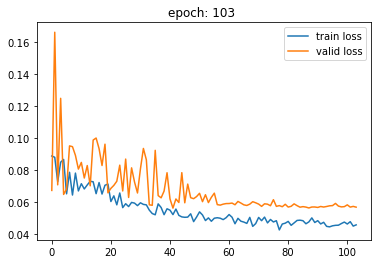

train loss:  0.04560383925071129
valid loss:  0.05668481758662632
epoch_train :  105
train loss:  0.04671838650336632
outputs :  tensor([[0.7070],
        [0.5902]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7213],
        [0.6002]], device='cuda:0')
valid_epoch: 105  valid_loss: 0.05794803159577506 


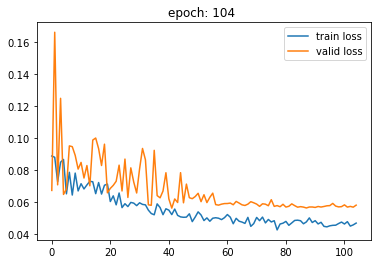

train loss:  0.04671838650336632
valid loss:  0.05794803159577506
epoch_train :  106
train loss:  0.04731544623008141
outputs :  tensor([[0.5161],
        [0.5731]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3541],
        [0.4539]], device='cuda:0')
valid_epoch: 106  valid_loss: 0.05666397299085345 


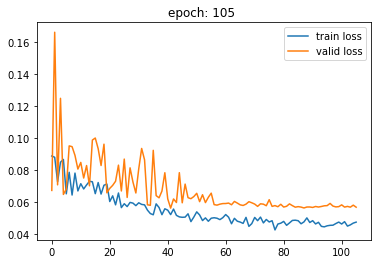

train loss:  0.04731544623008141
valid loss:  0.05666397299085345
epoch_train :  107
train loss:  0.04632726540932289
outputs :  tensor([[0.5428],
        [0.4912]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5566],
        [0.5900]], device='cuda:0')
valid_epoch: 107  valid_loss: 0.057348200253077915 


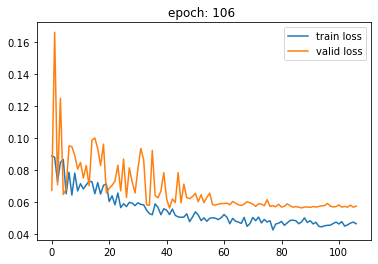

train loss:  0.04632726540932289
valid loss:  0.057348200253077915
epoch_train :  108
train loss:  0.045100037868206315
outputs :  tensor([[0.5268],
        [0.3678]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5558],
        [0.3552]], device='cuda:0')
valid_epoch: 108  valid_loss: 0.05828438486371722 


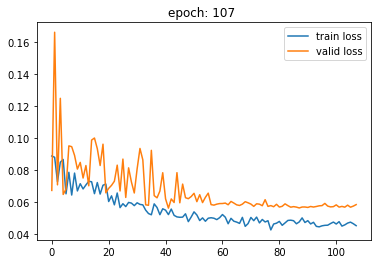

train loss:  0.045100037868206315
valid loss:  0.05828438486371722
epoch_train :  109
train loss:  0.048231624639951266
outputs :  tensor([[0.5322],
        [0.5673]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5900],
        [0.6091]], device='cuda:0')
valid_epoch: 109  valid_loss: 0.05739282710211618 


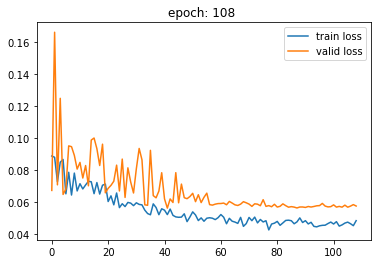

train loss:  0.048231624639951266
valid loss:  0.05739282710211618
epoch_train :  110
train loss:  0.048568941079653226
outputs :  tensor([[0.2794],
        [0.5181]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4577],
        [0.6102]], device='cuda:0')
valid_epoch: 110  valid_loss: 0.057457881314413886 


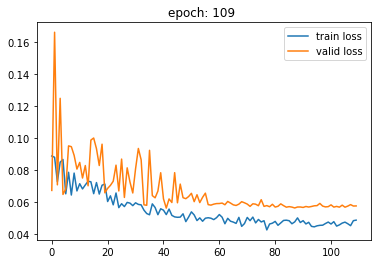

train loss:  0.048568941079653226
valid loss:  0.057457881314413886
epoch_train :  111
train loss:  0.047743215010716364
outputs :  tensor([[0.2843],
        [0.3840]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4120],
        [0.4175]], device='cuda:0')
valid_epoch: 111  valid_loss: 0.05733464445386614 


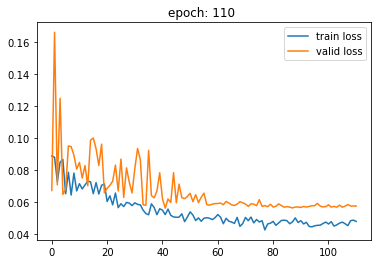

train loss:  0.047743215010716364
valid loss:  0.05733464445386614
epoch_train :  112
train loss:  0.04774755239486694
outputs :  tensor([[0.2601],
        [0.5899]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2257],
        [0.3421]], device='cuda:0')
valid_epoch: 112  valid_loss: 0.05715823173522949 


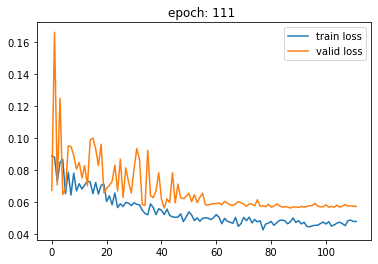

train loss:  0.04774755239486694
valid loss:  0.05715823173522949
epoch_train :  113
train loss:  0.04680346525632418
outputs :  tensor([[0.5468],
        [0.2443]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6268],
        [0.2693]], device='cuda:0')
valid_epoch: 113  valid_loss: 0.05826707397188459 


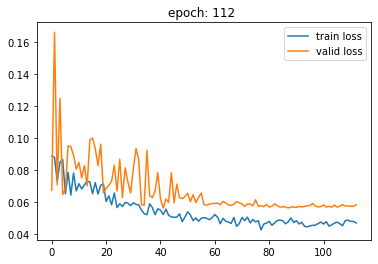

train loss:  0.04680346525632418
valid loss:  0.05826707397188459
epoch_train :  114
train loss:  0.047244915595421426
outputs :  tensor([[0.3617],
        [0.2175]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4577],
        [0.2571]], device='cuda:0')
valid_epoch: 114  valid_loss: 0.05810943671635219 


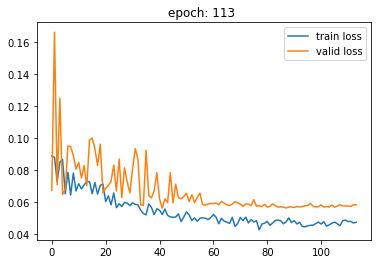

train loss:  0.047244915595421426
valid loss:  0.05810943671635219
epoch_train :  115
train loss:  0.045547274442819446
outputs :  tensor([[0.4792],
        [0.2575]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5775],
        [0.2265]], device='cuda:0')
valid_epoch: 115  valid_loss: 0.05732327699661255 


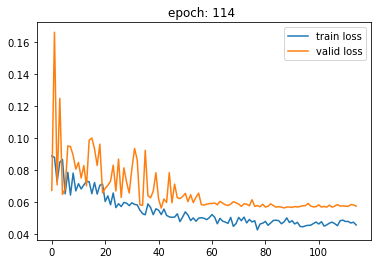

train loss:  0.045547274442819446
valid loss:  0.05732327699661255
epoch_train :  116
train loss:  0.046056972100184515
outputs :  tensor([[0.6983],
        [0.5831]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6907],
        [0.6206]], device='cuda:0')
valid_epoch: 116  valid_loss: 0.056531348398753574 


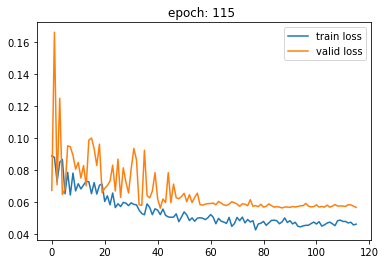

train loss:  0.046056972100184515
valid loss:  0.056531348398753574
epoch_train :  117
train loss:  0.04760208955177894
outputs :  tensor([[0.6765],
        [0.3742]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7356],
        [0.3692]], device='cuda:0')
valid_epoch: 117  valid_loss: 0.05807160905429295 


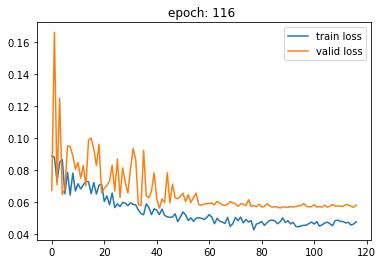

train loss:  0.04760208955177894
valid loss:  0.05807160905429295
epoch_train :  118
train loss:  0.04611585231927725
outputs :  tensor([[0.3484],
        [0.3433]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4488],
        [0.2973]], device='cuda:0')
valid_epoch: 118  valid_loss: 0.057404092379978726 


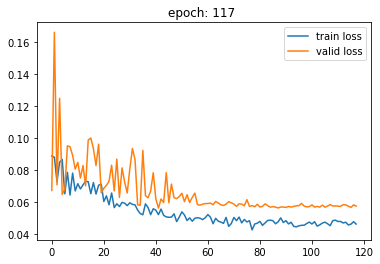

train loss:  0.04611585231927725
valid loss:  0.057404092379978726
epoch_train :  119
train loss:  0.04496780267128578
outputs :  tensor([[0.4256],
        [0.6963]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3181],
        [0.6848]], device='cuda:0')
valid_epoch: 119  valid_loss: 0.05660825116293771 


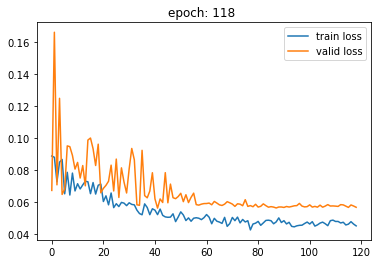

train loss:  0.04496780267128578
valid loss:  0.05660825116293771
epoch_train :  120
train loss:  0.04690253276091356
outputs :  tensor([[0.5680],
        [0.5426]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5900],
        [0.3599]], device='cuda:0')
valid_epoch: 120  valid_loss: 0.0567661098071507 


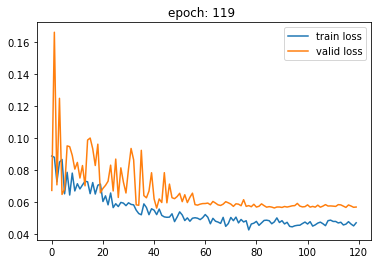

train loss:  0.04690253276091356
valid loss:  0.0567661098071507
epoch_train :  121
train loss:  0.04745974907508263
outputs :  tensor([[0.5990],
        [0.4770]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6706],
        [0.4939]], device='cuda:0')
valid_epoch: 121  valid_loss: 0.05844000407627651 


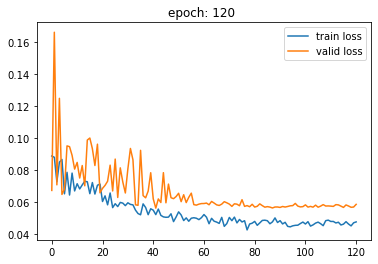

train loss:  0.04745974907508263
valid loss:  0.05844000407627651
epoch_train :  122
train loss:  0.04381940915034367
outputs :  tensor([[0.2614],
        [0.2550]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2693],
        [0.2559]], device='cuda:0')
valid_epoch: 122  valid_loss: 0.05790071402277265 


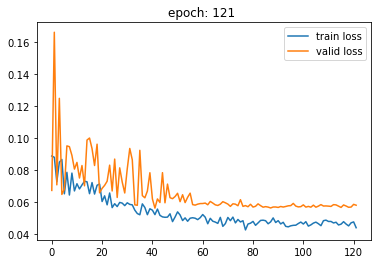

train loss:  0.04381940915034367
valid loss:  0.05790071402277265
epoch_train :  123
train loss:  0.049593022236457236
outputs :  tensor([[0.3555],
        [0.4196]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2688],
        [0.2812]], device='cuda:0')
valid_epoch: 123  valid_loss: 0.05715373584202358 


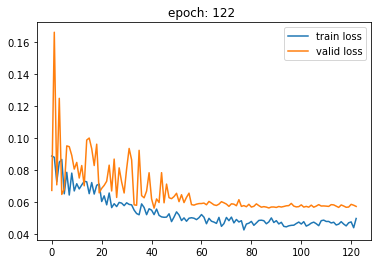

train loss:  0.049593022236457236
valid loss:  0.05715373584202358
epoch_train :  124
train loss:  0.045907291082235485
outputs :  tensor([[0.2594],
        [0.2795]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2428],
        [0.2354]], device='cuda:0')
valid_epoch: 124  valid_loss: 0.057385146617889404 


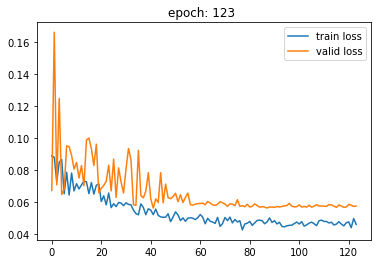

train loss:  0.045907291082235485
valid loss:  0.057385146617889404
epoch_train :  125
train loss:  0.0448076816705557
outputs :  tensor([[0.6120],
        [0.6445]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6691],
        [0.6274]], device='cuda:0')
valid_epoch: 125  valid_loss: 0.056765573365347724 


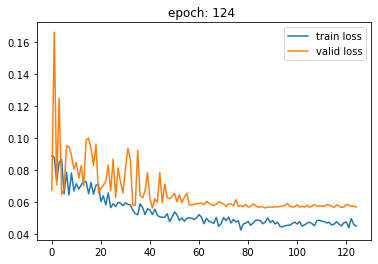

train loss:  0.0448076816705557
valid loss:  0.056765573365347724
epoch_train :  126
train loss:  0.046227487233968884
outputs :  tensor([[0.3991],
        [0.5397]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3196],
        [0.3507]], device='cuda:0')
valid_epoch: 126  valid_loss: 0.05691711391721453 


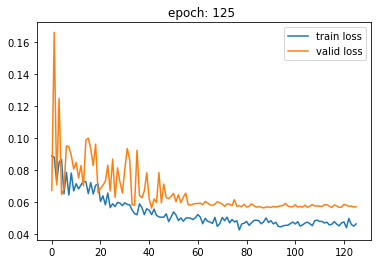

train loss:  0.046227487233968884
valid loss:  0.05691711391721453
epoch_train :  127
train loss:  0.04648453914202177
outputs :  tensor([[0.6254],
        [0.3909]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6815],
        [0.2974]], device='cuda:0')
valid_epoch: 127  valid_loss: 0.05690201265471322 


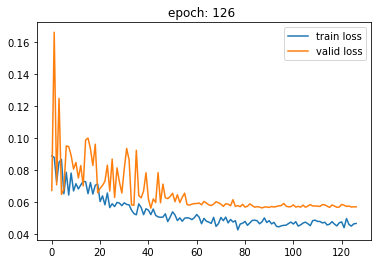

train loss:  0.04648453914202177
valid loss:  0.05690201265471322
epoch_train :  128
train loss:  0.046809448645665094
outputs :  tensor([[0.3631],
        [0.5766]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2928],
        [0.5692]], device='cuda:0')
valid_epoch: 128  valid_loss: 0.05708075846944537 


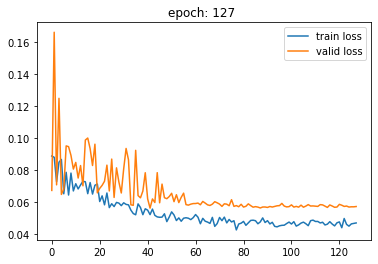

train loss:  0.046809448645665094
valid loss:  0.05708075846944537
epoch_train :  129
train loss:  0.04799604415893555
outputs :  tensor([[0.6404],
        [0.6376]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6354],
        [0.6296]], device='cuda:0')
valid_epoch: 129  valid_loss: 0.05777999332972935 


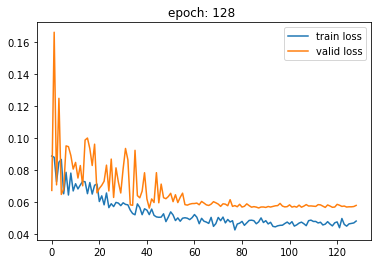

train loss:  0.04799604415893555
valid loss:  0.05777999332972935
epoch_train :  130
train loss:  0.044981534664447494
outputs :  tensor([[0.5776],
        [0.4815]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5558],
        [0.4346]], device='cuda:0')
valid_epoch: 130  valid_loss: 0.05695323433194842 


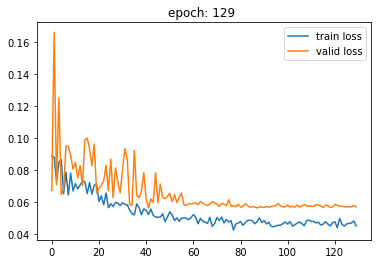

train loss:  0.044981534664447494
valid loss:  0.05695323433194842
epoch_train :  131
train loss:  0.045468610066633955
outputs :  tensor([[0.5323],
        [0.3632]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5828],
        [0.4707]], device='cuda:0')
valid_epoch: 131  valid_loss: 0.0566454359463283 


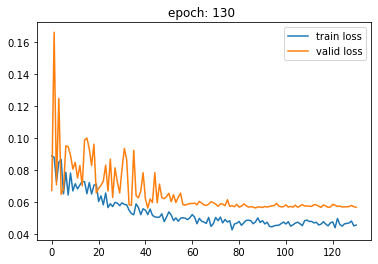

train loss:  0.045468610066633955
valid loss:  0.0566454359463283
epoch_train :  132
train loss:  0.045998215675354004
outputs :  tensor([[0.6226],
        [0.4263]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5866],
        [0.3089]], device='cuda:0')
valid_epoch: 132  valid_loss: 0.05758326819964817 


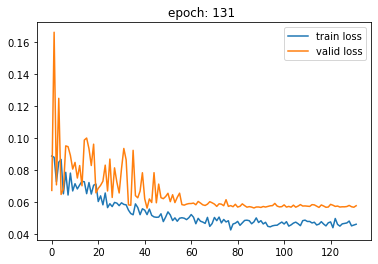

train loss:  0.045998215675354004
valid loss:  0.05758326819964817
epoch_train :  133
train loss:  0.04722393476046049
outputs :  tensor([[0.3677],
        [0.6197]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3146],
        [0.6092]], device='cuda:0')
valid_epoch: 133  valid_loss: 0.05695808359554836 


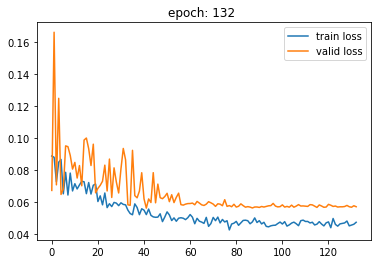

train loss:  0.04722393476046049
valid loss:  0.05695808359554836
epoch_train :  134
train loss:  0.0480428383900569
outputs :  tensor([[0.2698],
        [0.6084]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2257],
        [0.6304]], device='cuda:0')
valid_epoch: 134  valid_loss: 0.05748322180339268 


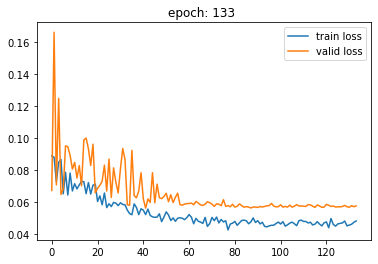

train loss:  0.0480428383900569
valid loss:  0.05748322180339268
epoch_train :  135
train loss:  0.04528859028449425
outputs :  tensor([[0.5995],
        [0.3695]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6002],
        [0.3823]], device='cuda:0')
valid_epoch: 135  valid_loss: 0.05734329564230783 


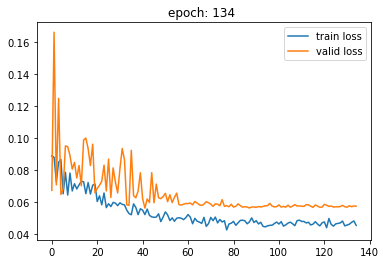

train loss:  0.04528859028449425
valid loss:  0.05734329564230783
epoch_train :  136
train loss:  0.04532411006780771
outputs :  tensor([[0.2560],
        [0.5086]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2738],
        [0.4833]], device='cuda:0')
valid_epoch: 136  valid_loss: 0.05709092106137957 


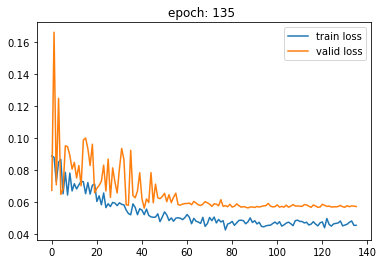

train loss:  0.04532411006780771
valid loss:  0.05709092106137957
epoch_train :  137
train loss:  0.0466310794536884
outputs :  tensor([[0.2791],
        [0.3829]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3137],
        [0.3692]], device='cuda:0')
valid_epoch: 137  valid_loss: 0.05819699593952724 


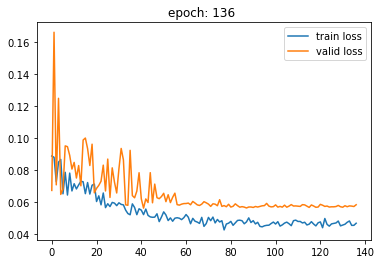

train loss:  0.0466310794536884
valid loss:  0.05819699593952724
epoch_train :  138
train loss:  0.04780053633909959
outputs :  tensor([[0.5282],
        [0.6888]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.6010],
        [0.6706]], device='cuda:0')
valid_epoch: 138  valid_loss: 0.056682701621736796 


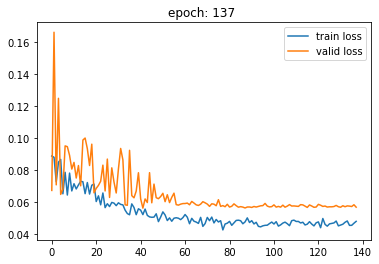

train loss:  0.04780053633909959
valid loss:  0.056682701621736796
epoch_train :  139
train loss:  0.04552328586578369
outputs :  tensor([[0.2649],
        [0.6002]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2559],
        [0.5866]], device='cuda:0')
valid_epoch: 139  valid_loss: 0.05708978857312884 


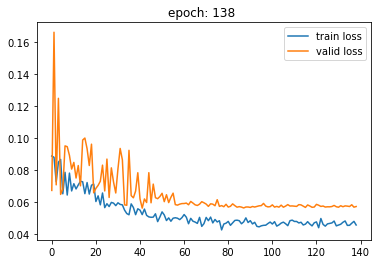

train loss:  0.04552328586578369
valid loss:  0.05708978857312884
epoch_train :  140
train loss:  0.0456998531634991
outputs :  tensor([[0.4604],
        [0.4082]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3859],
        [0.3258]], device='cuda:0')
valid_epoch: 140  valid_loss: 0.05722779035568237 


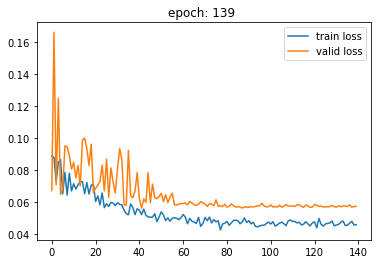

train loss:  0.0456998531634991
valid loss:  0.05722779035568237
epoch_train :  141
train loss:  0.04597784005678617
outputs :  tensor([[0.5325],
        [0.4252]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4526],
        [0.4036]], device='cuda:0')
valid_epoch: 141  valid_loss: 0.056996711662837436 


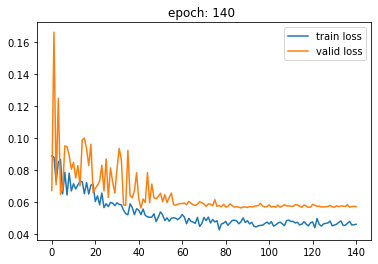

train loss:  0.04597784005678617
valid loss:  0.056996711662837436
epoch_train :  142
train loss:  0.0457952251801124
outputs :  tensor([[0.4264],
        [0.2922]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4671],
        [0.2950]], device='cuda:0')
valid_epoch: 142  valid_loss: 0.057765718017305644 


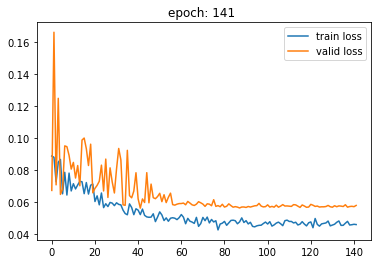

train loss:  0.0457952251801124
valid loss:  0.057765718017305644
epoch_train :  143
train loss:  0.046884266229776234
outputs :  tensor([[0.3921],
        [0.4026]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5253],
        [0.3940]], device='cuda:0')
valid_epoch: 143  valid_loss: 0.05732742377689907 


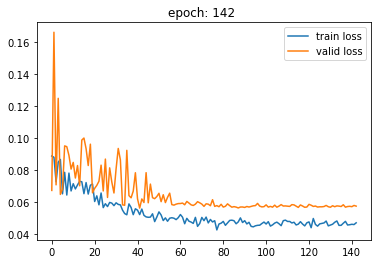

train loss:  0.046884266229776234
valid loss:  0.05732742377689907
epoch_train :  144
train loss:  0.04657474389443031
outputs :  tensor([[0.5594],
        [0.5400]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.5566],
        [0.4810]], device='cuda:0')
valid_epoch: 144  valid_loss: 0.057729286806924004 


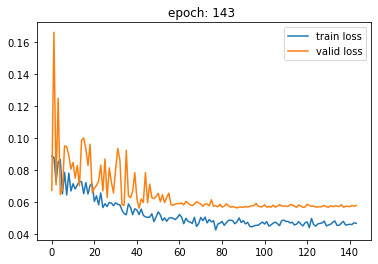

train loss:  0.04657474389443031
valid loss:  0.057729286806924004
epoch_train :  145
train loss:  0.04619992696321928
outputs :  tensor([[0.4953],
        [0.3759]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4299],
        [0.3896]], device='cuda:0')
valid_epoch: 145  valid_loss: 0.05716627836227417 


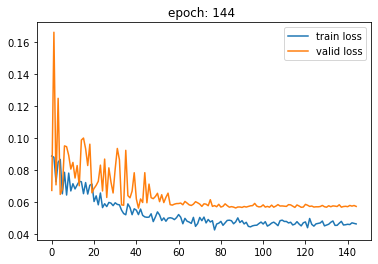

train loss:  0.04619992696321928
valid loss:  0.05716627836227417
epoch_train :  146
train loss:  0.04733087007816021
outputs :  tensor([[0.2494],
        [0.6469]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.2431],
        [0.6200]], device='cuda:0')
valid_epoch: 146  valid_loss: 0.05716056057385036 


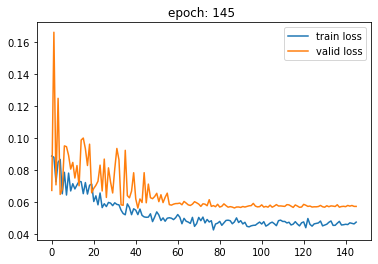

train loss:  0.04733087007816021
valid loss:  0.05716056057385036
epoch_train :  147
train loss:  0.0476458531159621
outputs :  tensor([[0.6953],
        [0.2702]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7084],
        [0.2462]], device='cuda:0')
valid_epoch: 147  valid_loss: 0.056978438581739156 


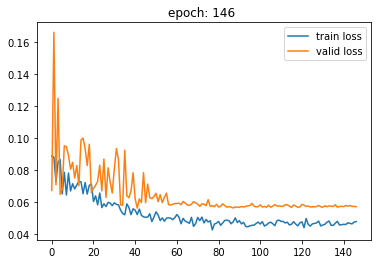

train loss:  0.0476458531159621
valid loss:  0.056978438581739156
epoch_train :  148
train loss:  0.04680393292353703
outputs :  tensor([[0.6495],
        [0.5834]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.7259],
        [0.5166]], device='cuda:0')
valid_epoch: 148  valid_loss: 0.05723609668867929 


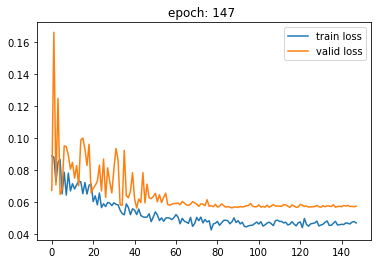

train loss:  0.04680393292353703
valid loss:  0.05723609668867929
epoch_train :  149
train loss:  0.0453033263866718
outputs :  tensor([[0.4798],
        [0.5642]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.3648],
        [0.5341]], device='cuda:0')
valid_epoch: 149  valid_loss: 0.056642847401755195 


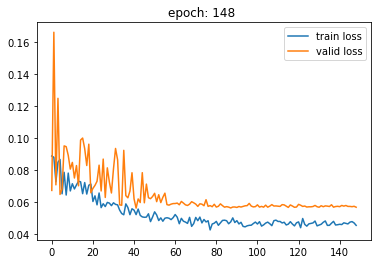

train loss:  0.0453033263866718
valid loss:  0.056642847401755195
epoch_train :  150
train loss:  0.048617037443014294
outputs :  tensor([[0.4982],
        [0.5044]], device='cuda:0', grad_fn=<SliceBackward>)
label :  tensor([[0.4081],
        [0.4637]], device='cuda:0')
valid_epoch: 150  valid_loss: 0.0568703327860151 


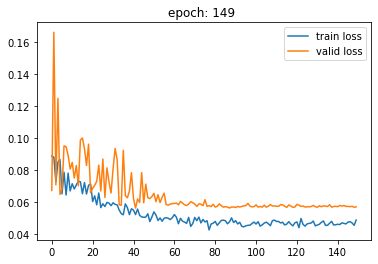

train loss:  0.048617037443014294
valid loss:  0.0568703327860151


In [19]:
# CNN model training
#원본 이미지에 대해서 resample를 해도 데이터 보존이 2p0나 1p5에 비해 워낙 잘 되어있어서 그만큼 데이터 complexity가 높다.

## 모델 파라미터 저장하는거 제목 꼭 바꿔라!!!!!! ##

count = 0
loss_valid = np.array([])
iteration_list = []
loss_train = np.array([])

for epoch in range(num_epochs):
    count += 1
    i=0
    l_epoch=0
    
    for batch in training_loader:
        model.to(device).train()
        inputs_train = batch['mri'][DATA].to(device)
        target_train = (batch['age']/100.).float().to(device)
        i=i+1
        optimizer.zero_grad()
        outputs = model(inputs_train)
        target_train= target_train.reshape(-1,1)
        loss = error(outputs, target_train).to(device)
        l_epoch+=loss
        loss.backward()
        optimizer.step()
        
    loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
    print('epoch_train : ',count)
    print('train loss: ',loss_train[-1])
    print('outputs : ',outputs[:5])
    print('label : ',target_train[:5])
    torch.save(model.state_dict(), f'v_210404_TOF_reg_PD_wholeimage_MRA.pth')
        
    i=0
    l_epoch=0
    with torch.no_grad():
        for batch in validation_loader:
          model.to(device).eval()
          inputs_test = batch['mri'][DATA].to(device)
          target_test = (batch['age']/100.).float().to(device)
          i=i+1
          outputs = model(inputs_test)
          target_test= target_test.reshape(-1,1)
          loss = error(outputs, target_test).to(device)
          l_epoch+=loss
        loss_valid = np.append(loss_valid,l_epoch.cpu().detach().numpy()/i)
        scheduler.step(loss_valid[-1])
    
    print('valid_epoch: {}  valid_loss: {} '.format(count, loss_valid[-1]))
    plt.plot(loss_train,label='train loss')
    plt.plot(loss_valid,label='valid loss')

    plt.legend(loc='upper right')
    plt.title('epoch: %d '%(epoch))
    plt.pause(.0001)

    print('train loss: ',loss_train[-1])
    print('valid loss: ',loss_valid[-1])


In [20]:
for param_group in optimizer.param_groups:
    print(param_group['lr'])

1.6917626201880554e-07


In [25]:
model.load_state_dict(torch.load('v_210404_TOF_reg_PD_wholeimage_MRA.pth'))

<All keys matched successfully>

In [24]:
with torch.no_grad():
    y_hat=np.array([])
    y=np.array([])
    for batch in validation_loader:
          model.to(device).eval()
          inputs_test = batch['mri'][torchio.DATA].to(device)
          target_test = (batch['age']/100).float().to(device)
          output = model(inputs_test)
          y_hat = np.append(y_hat,output.cpu().detach().numpy())
          y = np.append(y,target_test.cpu().detach().numpy())

print(y_hat)
print(y)

[0.59268904 0.64268535 0.54645938 0.3255235  0.37714693 0.25341985
 0.28158435 0.30677232 0.49414951 0.56260556 0.65576786 0.56591922
 0.6728844  0.61030936 0.60111129 0.60278589 0.51246953 0.42094618
 0.57784152 0.55763239 0.68033677 0.54257333 0.53509462 0.65954483
 0.28958809 0.32127404 0.65281254 0.67555541 0.48561406 0.40981883
 0.34313703 0.64135849 0.3083545  0.47601572 0.27959901 0.73494196
 0.71029019 0.23864436 0.53658193 0.6870048  0.35970128 0.48712733
 0.29489863 0.67590714 0.44746804 0.60546643 0.32410786 0.23511463
 0.41405126 0.32107666]
[0.62061602 0.449911   0.59222448 0.29092404 0.48678985 0.22973306
 0.50650239 0.22431211 0.69067764 0.59381247 0.68509239 0.44093087
 0.72884321 0.52498287 0.63096505 0.74026006 0.60027379 0.41511294
 0.56873375 0.48254621 0.66907603 0.58376455 0.59742641 0.61587954
 0.27822042 0.24895278 0.74636549 0.64646131 0.37210128 0.44481862
 0.31854895 0.60596853 0.36670771 0.505243   0.40035591 0.65667349
 0.69546884 0.24689938 0.54685831 0.74

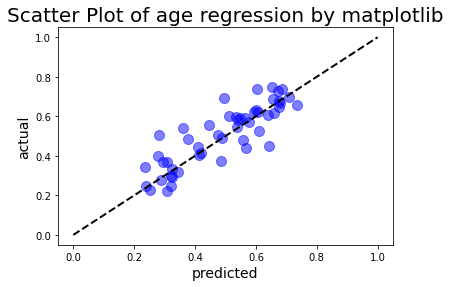

In [25]:
plt.plot(y_hat,y,linestyle='none',marker='o',markersize=10,color='blue',alpha=0.5)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.title('Scatter Plot of age regression by matplotlib', fontsize=20)
plt.xlabel('predicted', fontsize=14)
plt.ylabel('actual', fontsize=14)
plt.show()

In [26]:
df = pd.DataFrame({"predicted":y_hat, "actual":y})
corr = df.corr(method = 'pearson') 
corr

predicted   actual
predicted    1.00000  0.85667
actual       0.85667  1.00000

In [45]:
import pandas as pd
root = 'Y:/neuro/IXI/IXIDB_age/IXIDB2.csv'
df = pd.read_csv(root)

In [46]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=0.1086,random_state=333)

In [47]:
df_test['MRA_predict_age'] = y_hat*100
df_test.drop('sex',axis=1, inplace=True)
df_test.drop('h',axis=1, inplace=True)
df_test.drop('w',axis=1, inplace=True)
df_test.drop('eth',axis=1, inplace=True)
df_test

C:\Users\user\Anaconda3\envs\dyb\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\envs\dyb\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


fn        age  MRA_predict_age
270  IXI358-Guys-0919  62.061602        59.268904
231  IXI287-Guys-0863  44.991102        64.268535
16   IXI029-Guys-0829  59.222450        54.645938
5    IXI017-Guys-0698  29.092402        32.552350
261  IXI342-Guys-0909  48.678987        37.714693
101  IXI122-Guys-0773  22.973306        25.341985
32     IXI048-HH-1326  50.650240        28.158435
126  IXI153-Guys-0782  22.431211        30.677232
360  IXI488-Guys-1015  69.067762        49.414951
128  IXI156-Guys-0837  59.381246        56.260556
338  IXI450-Guys-1093  68.509240        65.576786
25   IXI040-Guys-0724  44.093087        56.591922
201  IXI250-Guys-0836  72.884326        67.288440
426    IXI608-HH-2599  52.498289        61.030936
145    IXI174-HH-1571  63.096509        60.111129
15   IXI028-Guys-1038  74.026010        60.278589
334    IXI445-HH-2269  60.027379        51.246953
81   IXI100-Guys-0747  41.511294        42.094618
454  IXI644-Guys-1121  56.873374        57.784152
118  IXI142-Guys-0786  48.254620        55.763239
284  IXI379-Guys-0943  66.907598        68.033677
333    IXI444-HH-2270  58.376454        54.257333
318  IXI418-Guys-0956  59.742642        53.509462
242  IXI311-Guys-0885  61.587953        65.954483
27   IXI042-Guys-0725  27.822040        28.958809
76     IXI095-HH-1390  24.895277        32.127404
171    IXI204-HH-1651  74.636550        65.281254
289    IXI385-HH-2078  64.646133        67.555541
22   IXI037-Guys-0704  37.210130        48.561406
256  IXI330-Guys-0881  44.481862        40.981883
33     IXI049-HH-1358  31.854894        34.313703
280  IXI370-Guys-0921  60.596851        64.135849
87   IXI106-Guys-0760  36.670773        30.835450
134    IXI162-HH-1548  50.524298        47.601572
30   IXI045-Guys-0713  40.035592        27.959901
394  IXI555-Guys-1074  65.667351        73.494196
206    IXI257-HH-1724  69.546886        71.029019
51     IXI067-HH-1356  24.689938        23.864436
443  IXI630-Guys-1108  54.685832        53.658193
288    IXI384-HH-2100  74.012320        68.700480
277  IXI367-Guys-0917  54.214921        35.970128
196  IXI244-Guys-0841  49.043121        48.712733
446    IXI633-HH-2689  36.706366        29.489863
246  IXI317-Guys-0896  67.794661        67.590714
323  IXI429-Guys-0997  55.540041        44.746804
262  IXI344-Guys-0905  62.094456        60.546643
413  IXI587-Guys-1128  33.593429        32.410786
43     IXI059-HH-1284  34.138261        23.511463
388  IXI528-Guys-1073  40.528405        41.405126
198  IXI247-Guys-0838  29.817933        32.107666

In [48]:
df_test['MRA_mae'] = df_test['MRA_predict_age']-df_test['age']
df_test

C:\Users\user\Anaconda3\envs\dyb\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


fn        age  MRA_predict_age    MRA_mae
270  IXI358-Guys-0919  62.061602        59.268904  -2.792698
231  IXI287-Guys-0863  44.991102        64.268535  19.277433
16   IXI029-Guys-0829  59.222450        54.645938  -4.576513
5    IXI017-Guys-0698  29.092402        32.552350   3.459947
261  IXI342-Guys-0909  48.678987        37.714693 -10.964294
101  IXI122-Guys-0773  22.973306        25.341985   2.368679
32     IXI048-HH-1326  50.650240        28.158435 -22.491804
126  IXI153-Guys-0782  22.431211        30.677232   8.246021
360  IXI488-Guys-1015  69.067762        49.414951 -19.652811
128  IXI156-Guys-0837  59.381246        56.260556  -3.120690
338  IXI450-Guys-1093  68.509240        65.576786  -2.932454
25   IXI040-Guys-0724  44.093087        56.591922  12.498835
201  IXI250-Guys-0836  72.884326        67.288440  -5.595885
426    IXI608-HH-2599  52.498289        61.030936   8.532647
145    IXI174-HH-1571  63.096509        60.111129  -2.985380
15   IXI028-Guys-1038  74.026010        60.278589 -13.747421
334    IXI445-HH-2269  60.027379        51.246953  -8.780425
81   IXI100-Guys-0747  41.511294        42.094618   0.583324
454  IXI644-Guys-1121  56.873374        57.784152   0.910778
118  IXI142-Guys-0786  48.254620        55.763239   7.508619
284  IXI379-Guys-0943  66.907598        68.033677   1.126080
333    IXI444-HH-2270  58.376454        54.257333  -4.119121
318  IXI418-Guys-0956  59.742642        53.509462  -6.233180
242  IXI311-Guys-0885  61.587953        65.954483   4.366529
27   IXI042-Guys-0725  27.822040        28.958809   1.136770
76     IXI095-HH-1390  24.895277        32.127404   7.232127
171    IXI204-HH-1651  74.636550        65.281254  -9.355296
289    IXI385-HH-2078  64.646133        67.555541   2.909408
22   IXI037-Guys-0704  37.210130        48.561406  11.351276
256  IXI330-Guys-0881  44.481862        40.981883  -3.499979
33     IXI049-HH-1358  31.854894        34.313703   2.458809
280  IXI370-Guys-0921  60.596851        64.135849   3.538998
87   IXI106-Guys-0760  36.670773        30.835450  -5.835324
134    IXI162-HH-1548  50.524298        47.601572  -2.922727
30   IXI045-Guys-0713  40.035592        27.959901 -12.075691
394  IXI555-Guys-1074  65.667351        73.494196   7.826845
206    IXI257-HH-1724  69.546886        71.029019   1.482134
51     IXI067-HH-1356  24.689938        23.864436  -0.825502
443  IXI630-Guys-1108  54.685832        53.658193  -1.027638
288    IXI384-HH-2100  74.012320        68.700480  -5.311840
277  IXI367-Guys-0917  54.214921        35.970128 -18.244794
196  IXI244-Guys-0841  49.043121        48.712733  -0.330388
446    IXI633-HH-2689  36.706366        29.489863  -7.216503
246  IXI317-Guys-0896  67.794661        67.590714  -0.203948
323  IXI429-Guys-0997  55.540041        44.746804 -10.793237
262  IXI344-Guys-0905  62.094456        60.546643  -1.547813
413  IXI587-Guys-1128  33.593429        32.410786  -1.182644
43     IXI059-HH-1284  34.138261        23.511463 -10.626798
388  IXI528-Guys-1073  40.528405        41.405126   0.876721
198  IXI247-Guys-0838  29.817933        32.107666   2.289733

In [49]:
df_test.to_csv('MRA_result.csv')

In [50]:
pwd

'Z:\\dyb\\brain age estimation_again'